# GSE65360 scATAC-Seq SPAN, MACS2 vs DNAse hypersensitive sites

Before launch corresponding .
```
git checkout https://github.com/JetBrains-Research/sc-atacseq-smk-pipeline
cd /mnt/stripe/shpynov/sc-atacseq-smk-pipeline

for Q in 0.1 0.5 0.01 1E-4 1E-6 1E-9 1E-12; do 
    echo $Q; 
    snakemake all --cores 24 --use-conda --config work_dir=/mnt/stripe/dievsky/GSE65360/ \ 
        fastq_dir=/mnt/stripe/dievsky/GSE65360/fastq/  indexes=/mnt/stripe/dievsky/issue75/indexes2/hg19 \
        macs2_suffix="q${Q}" macs2_stats="-q ${Q}"; 
done
```


In [ ]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os;
from pybedtools import BedTool;
import subprocess;
import math;

In [32]:
CELLS = ["BJ", 
         "EML", 
         "GM12878", 
         "H1", 
        "HL_60",
        "K562",
        "TF_1",
        "V6.5"]
CELLS.append('total_pooled_data')
EXPERIMENT_FOLDER = "/mnt/stripe/dievsky/GSE65360"
# Switch to the same Q values as SPAN
# MACS2_PS = ["0.001", "0.0001", "0.00001"]
# Use same settings as for SPAN
QS = ["0.5", "0.1", "0.01", "1E-4", "1E-6", "1E-9", "1E-12"]
MACS2_QS = QS
# discover MACS2 peak files
macs2_peaks_paths = {}
for cell in CELLS:
    macs2_peaks_paths[cell] = {
        q: os.path.join(EXPERIMENT_FOLDER, "cleaned_cell_peaks", "macs2",
                        "{}_q{}_peaks.narrowPeak".format(cell, q)) for q in MACS2_QS}
macs2_peaks_paths["total_pooled_data"] = {
    q: os.path.join(EXPERIMENT_FOLDER, "cleaned_all_peaks", "macs2",
                    "pooled_q{}_peaks.narrowPeak".format(q)) for q in MACS2_QS}

# discover Span model files and BAMs
SPAN_BINS = ["100"]
span_model_paths = {}
bam_paths = {}
for cell in CELLS:
    bam_paths[cell] = os.path.join(EXPERIMENT_FOLDER, "cleaned_cells", "{}.bam".format(cell))
    span_model_paths[cell] = {span_bin: os.path.join(EXPERIMENT_FOLDER, "cleaned_cell_peaks", "span", "{}_{}.span".format(cell, span_bin)) for span_bin in SPAN_BINS}
bam_paths["total_pooled_data"] = os.path.join(EXPERIMENT_FOLDER, "cleaned_all", "pooled.bam")
span_model_paths["total_pooled_data"] = {span_bin: os.path.join(EXPERIMENT_FOLDER, "cleaned_all_peaks", "span", "pooled_{}.span".format(span_bin)) for span_bin in SPAN_BINS}
SPAN_JAR = os.path.join(EXPERIMENT_FOLDER, "bin", "span-0.11.0.jar")



# DHS was obtained from https://www.encodeproject.org
# hg19 representative DHS sites: https://www.encodeproject.org/annotations/ENCSR664FOJ/
DHS_FILES={
    "BJ": BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "BJ.bed")),
    "GM12878": BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "GM12878.bed")),
    "H1": BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "H1.bed")),
    "HL_60": BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "HL_60.bed")),
    "K562": BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "BJ.bed")),
}
dhs_hg19 = BedTool(os.path.join(EXPERIMENT_FOLDER, "dhs", "hg19.bed"))

CHROM_SIZES = os.path.join(EXPERIMENT_FOLDER, "hg19.chrom.sizes")

In [33]:
main_dataframe = pd.DataFrame(columns=['peak_caller', 'cell', 'q', 'bin', 'gap',
                                       'peak_count', 'dhs_by_peak', 'peak_by_dhs'])

# Populate MACS2 entries

In [34]:
for cell in CELLS:
    for q in MACS2_QS:
        print("Processing {} for q={}".format(cell, q))
        peaks_file = BedTool(macs2_peaks_paths[cell][q])
        peak_count = peaks_file.count()
        dhs_file = DHS_FILES[cell] if cell in DHS_FILES else dhs_hg19
        overlap = peaks_file.intersect(dhs_file, wa=True, u=True).count()
        peak_by_dhs = overlap * 100.0 / peak_count            
        overlap = dhs_file.intersect(peaks_file, wa=True, u=True).count()
        dhs_by_peak = overlap * 100.0 / dhs_file.count()
        main_dataframe.loc[len(main_dataframe)] = ('macs2', cell, float(q), math.nan, math.nan,
                                                   peak_count, dhs_by_peak, peak_by_dhs)
main_dataframe.head()

Processing BJ for q=0.5
Processing BJ for q=0.1
Processing BJ for q=0.01
Processing BJ for q=1E-4
Processing BJ for q=1E-6
Processing BJ for q=1E-9
Processing BJ for q=1E-12
Processing EML for q=0.5
Processing EML for q=0.1
Processing EML for q=0.01
Processing EML for q=1E-4
Processing EML for q=1E-6
Processing EML for q=1E-9
Processing EML for q=1E-12
Processing GM12878 for q=0.5
Processing GM12878 for q=0.1
Processing GM12878 for q=0.01
Processing GM12878 for q=1E-4
Processing GM12878 for q=1E-6
Processing GM12878 for q=1E-9
Processing GM12878 for q=1E-12
Processing H1 for q=0.5
Processing H1 for q=0.1
Processing H1 for q=0.01
Processing H1 for q=1E-4
Processing H1 for q=1E-6
Processing H1 for q=1E-9
Processing H1 for q=1E-12
Processing HL_60 for q=0.5
Processing HL_60 for q=0.1
Processing HL_60 for q=0.01
Processing HL_60 for q=1E-4
Processing HL_60 for q=1E-6
Processing HL_60 for q=1E-9
Processing HL_60 for q=1E-12
Processing K562 for q=0.5
Processing K562 for q=0.1
Processing K562

,peak_caller,cell,q,bin,gap,peak_count,dhs_by_peak,peak_by_dhs
0,macs2,BJ,0.500000,NaN,NaN,237980,40.179691,46.434574
1,macs2,BJ,0.100000,NaN,NaN,74227,22.595474,87.166395
2,macs2,BJ,0.010000,NaN,NaN,47041,14.968467,94.477158
3,macs2,BJ,0.000100,NaN,NaN,33478,10.604490,96.774001
4,macs2,BJ,0.000001,NaN,NaN,24570,7.648774,97.627188


# Populate Span entries

In [35]:
SPAN_FDRS = QS
SPAN_GAPS = ["5"]
for cell in CELLS:
    bam_path = bam_paths[cell]
    for span_bin in SPAN_BINS:    
        model_path = span_model_paths[cell][span_bin]
        work_dir = os.path.dirname(model_path)
        for span_fdr in SPAN_FDRS:
            for span_gap in SPAN_GAPS:
                peaks_path = "/tmp/span_peaks.bed"
                command = ('java -jar {} analyze -t {} --chrom.sizes {} --model {} --bin {} '
                           '--keep-dup true --fragment 0 '
                           '--fdr {} --gap {} --peaks {} --workdir {} --threads 8').format(
                    SPAN_JAR, bam_path, CHROM_SIZES, model_path, span_bin, span_fdr, span_gap, peaks_path, work_dir)
                print('Running ' + command)
                subprocess.run(command, shell=True, check=True)
                peaks_file = BedTool(peaks_path)
                peak_count = peaks_file.count()
                print(peak_count)
                dhs_file = DHS_FILES[cell] if cell in DHS_FILES else dhs_hg19
                overlap = peaks_file.intersect(dhs_file, wa=True, u=True).count()
                peak_by_dhs = overlap * 100.0 / peak_count            
                overlap = dhs_file.intersect(peaks_file, wa=True, u=True).count()
                dhs_by_peak = overlap * 100.0 / dhs_file.count()
                main_dataframe.loc[len(main_dataframe)] = \
                ('span', cell, float(span_fdr), int(span_bin), 
                 int(span_gap), peak_count, dhs_by_peak, peak_by_dhs)

Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/BJ.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/BJ_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.5 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
241350
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/BJ.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/BJ_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.1 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
288955
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/BJ.bam --chrom.sizes /m

Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/GM12878.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/GM12878_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-9 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
38722
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/GM12878.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/GM12878_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-12 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
30952
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/H1

64502
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/K562.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/K562_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-4 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
49284
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/K562.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span/K562_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-6 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_cell_peaks/span --threads 8
39584
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_cells/K562.bam 

300984
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_all/pooled.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_all_peaks/span/pooled_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.1 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_all_peaks/span --threads 8
171567
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_all/pooled.bam --chrom.sizes /mnt/stripe/dievsky/GSE65360/hg19.chrom.sizes --model /mnt/stripe/dievsky/GSE65360/cleaned_all_peaks/span/pooled_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.01 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/dievsky/GSE65360/cleaned_all_peaks/span --threads 8
141426
Running java -jar /mnt/stripe/dievsky/GSE65360/bin/span-0.11.0.jar analyze -t /mnt/stripe/dievsky/GSE65360/cleaned_all/pooled.ba

In [36]:
main_dataframe.describe()

,q,bin,gap,dhs_by_peak,peak_by_dhs
count,1.260000e+02,63.0,63.0,126.000000,126.000000
mean,8.715729e-02,100.0,5.0,20.913658,70.878621
std,1.726188e-01,0.0,0.0,25.378905,26.281692
min,1.000000e-12,100.0,5.0,0.002695,6.568161
25%,1.000000e-09,100.0,5.0,1.013899,54.859225
50%,1.000000e-04,100.0,5.0,10.992715,76.466763
75%,1.000000e-01,100.0,5.0,32.526786,93.924071
max,5.000000e-01,100.0,5.0,95.212164,99.946538


In [37]:
overlap_dataframe = main_dataframe[np.logical_not(np.isnan(main_dataframe['dhs_by_peak']))]
overlap_dataframe.describe()

,q,bin,gap,dhs_by_peak,peak_by_dhs
count,1.260000e+02,63.0,63.0,126.000000,126.000000
mean,8.715729e-02,100.0,5.0,20.913658,70.878621
std,1.726188e-01,0.0,0.0,25.378905,26.281692
min,1.000000e-12,100.0,5.0,0.002695,6.568161
25%,1.000000e-09,100.0,5.0,1.013899,54.859225
50%,1.000000e-04,100.0,5.0,10.992715,76.466763
75%,1.000000e-01,100.0,5.0,32.526786,93.924071
max,5.000000e-01,100.0,5.0,95.212164,99.946538


# Plot DHS overlap
NOTE: there is information only about the monocytes

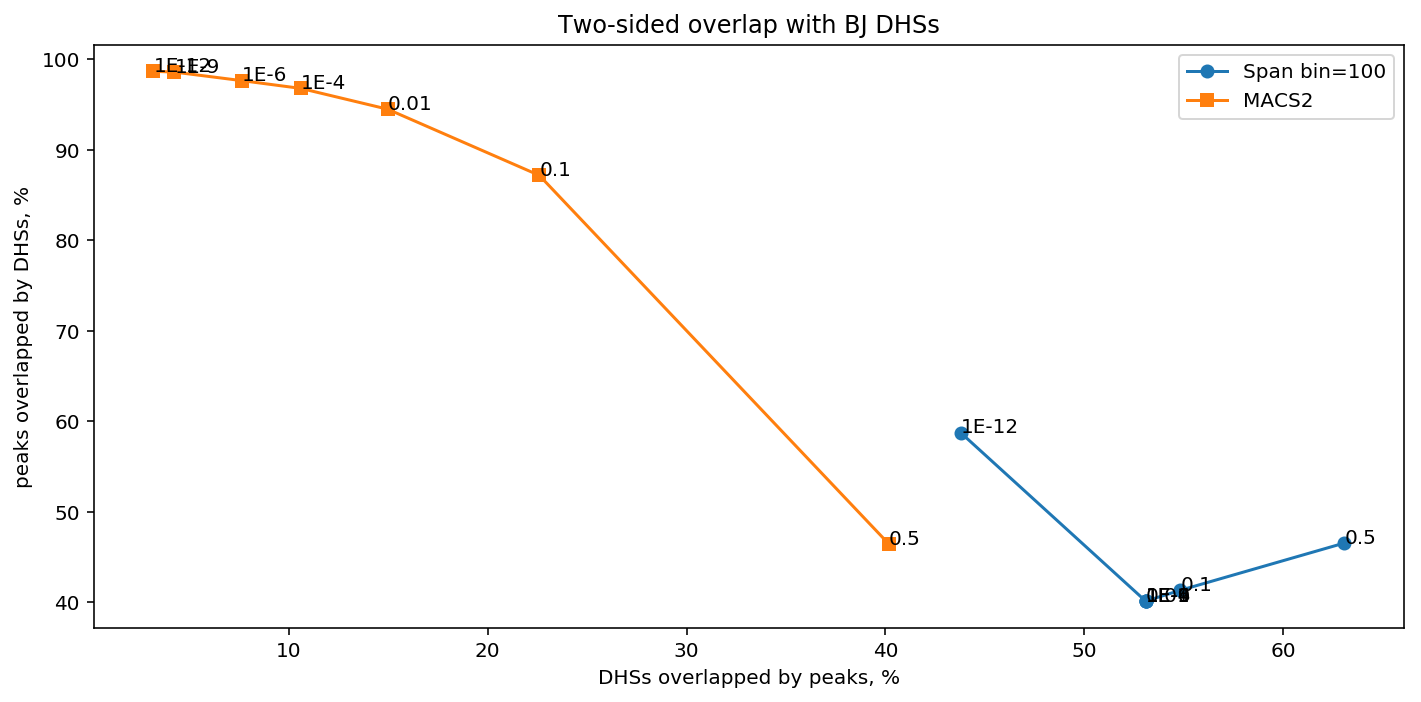

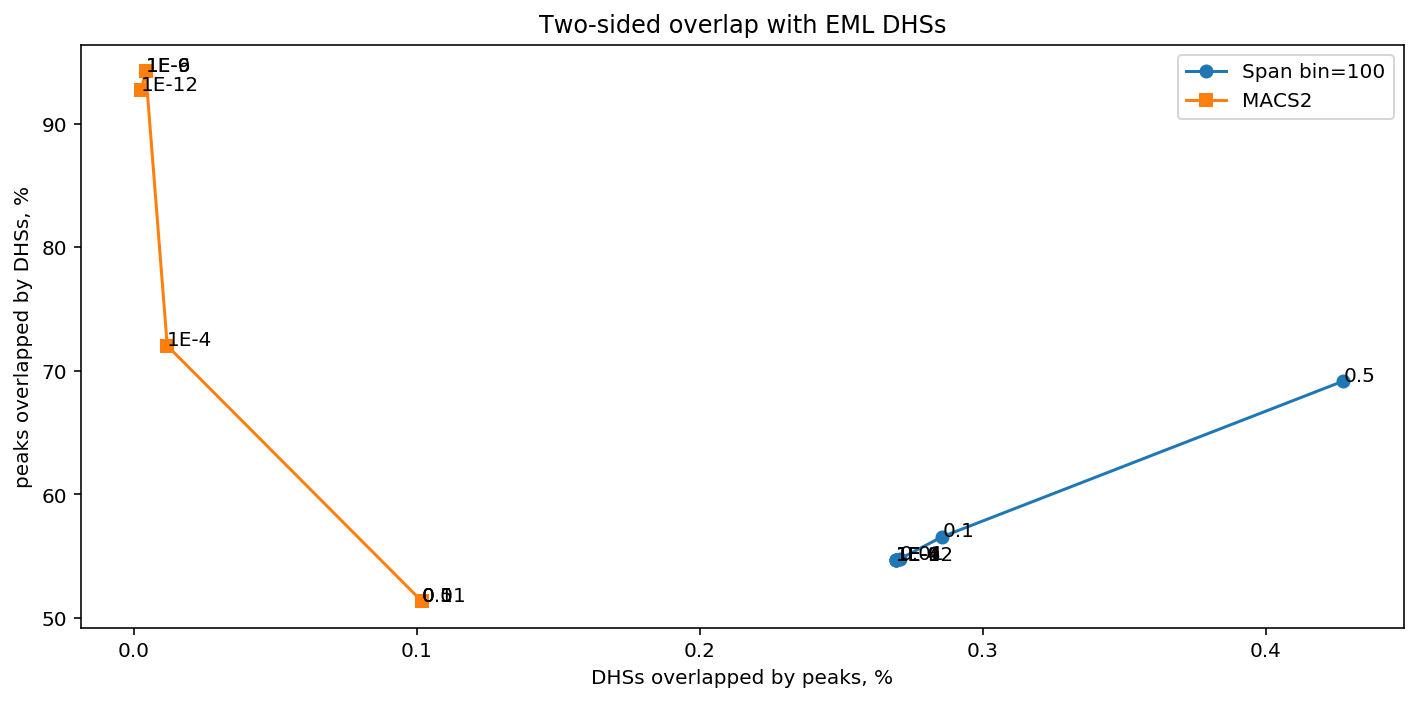

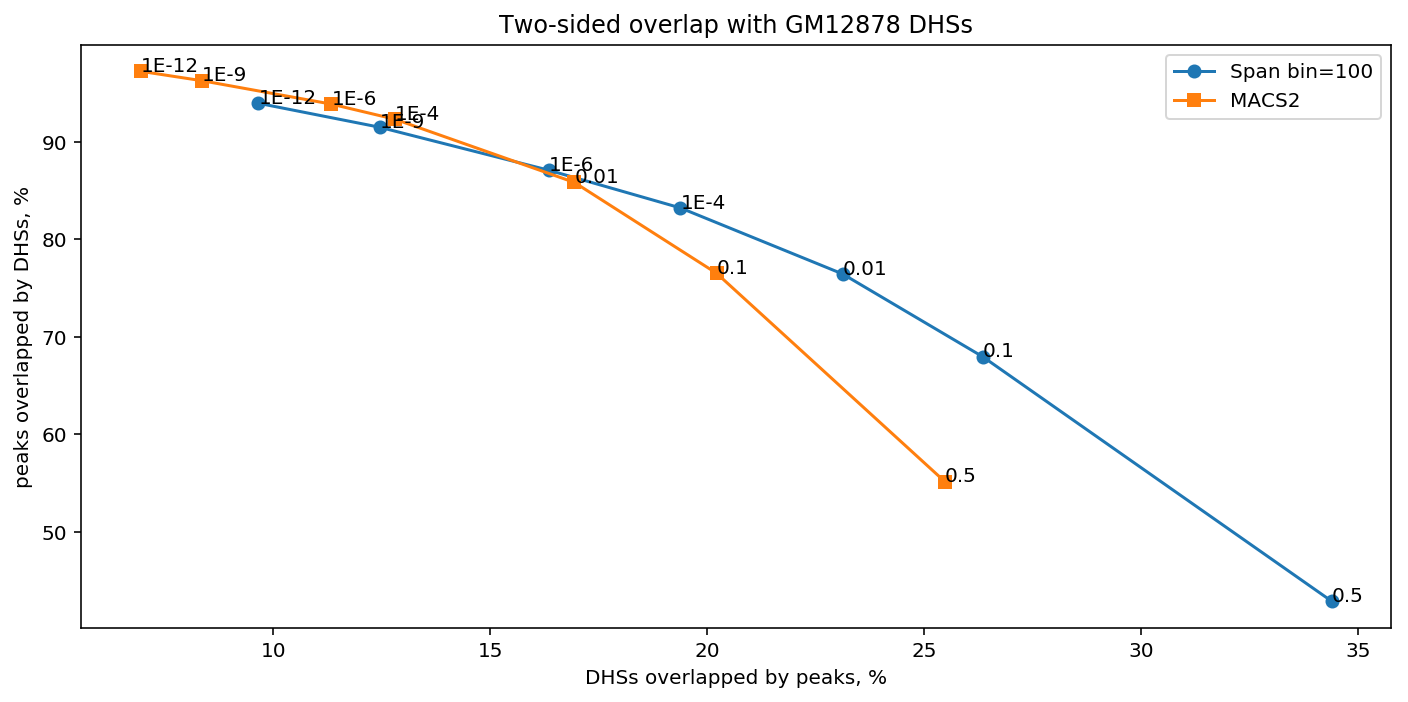

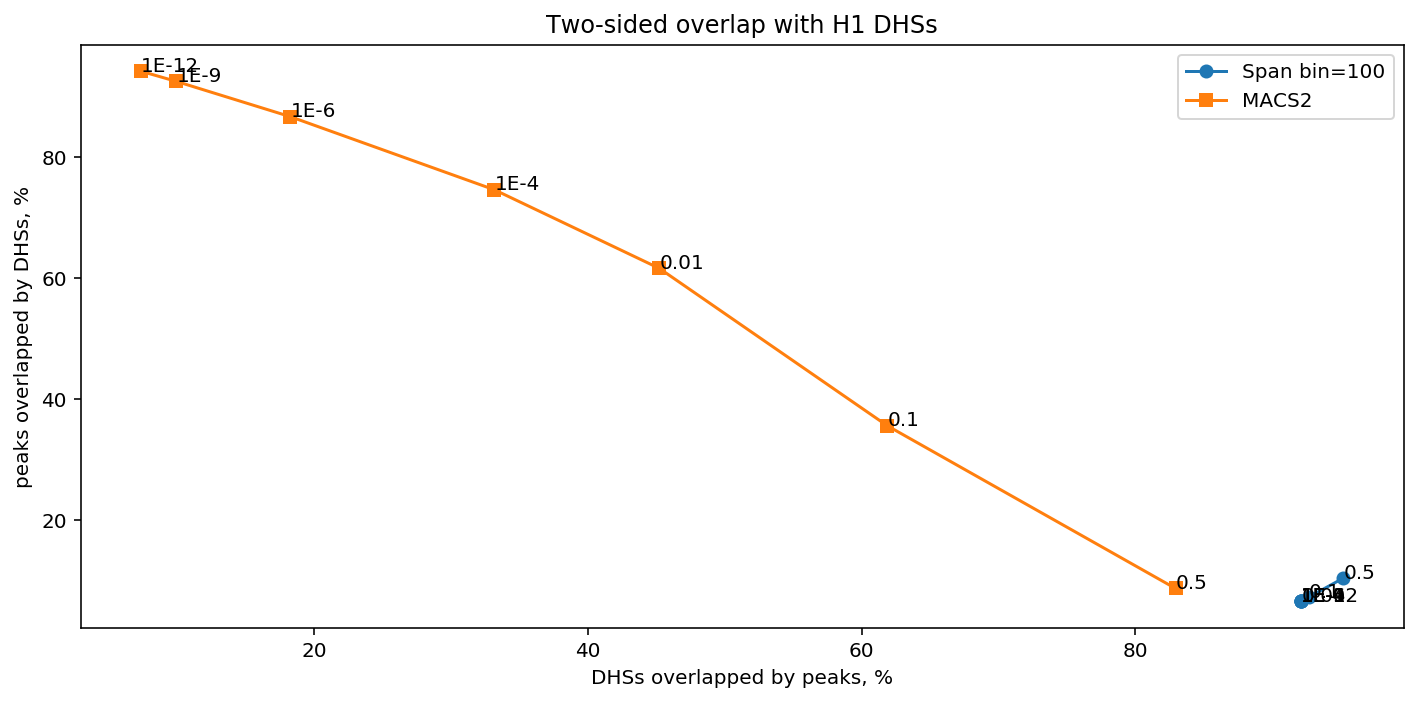

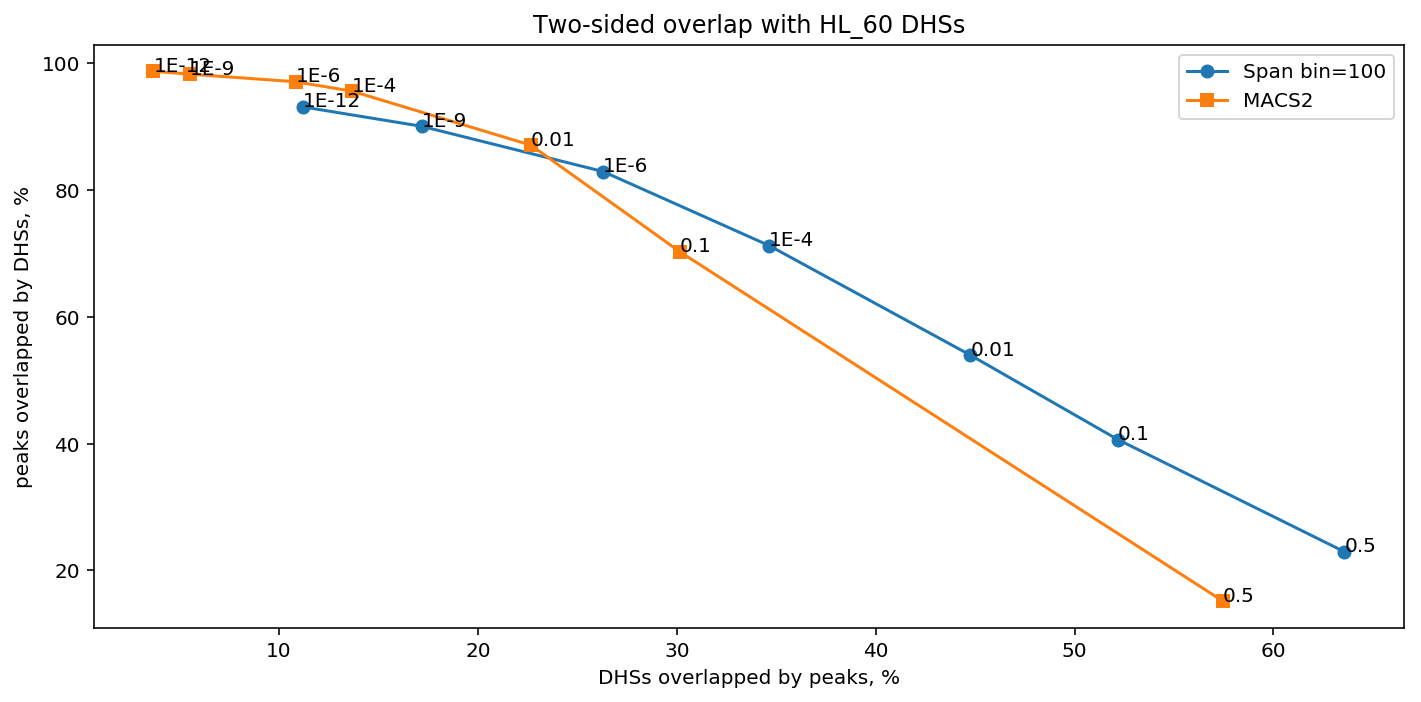

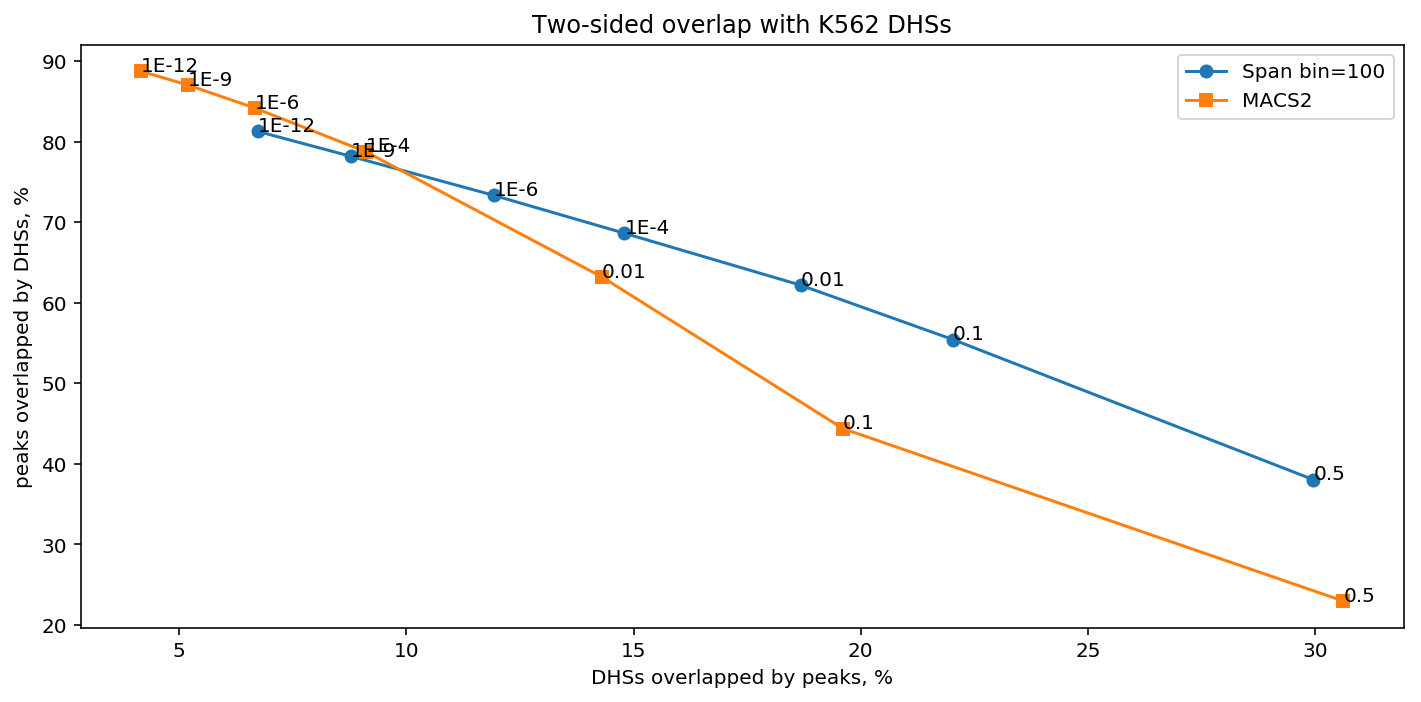

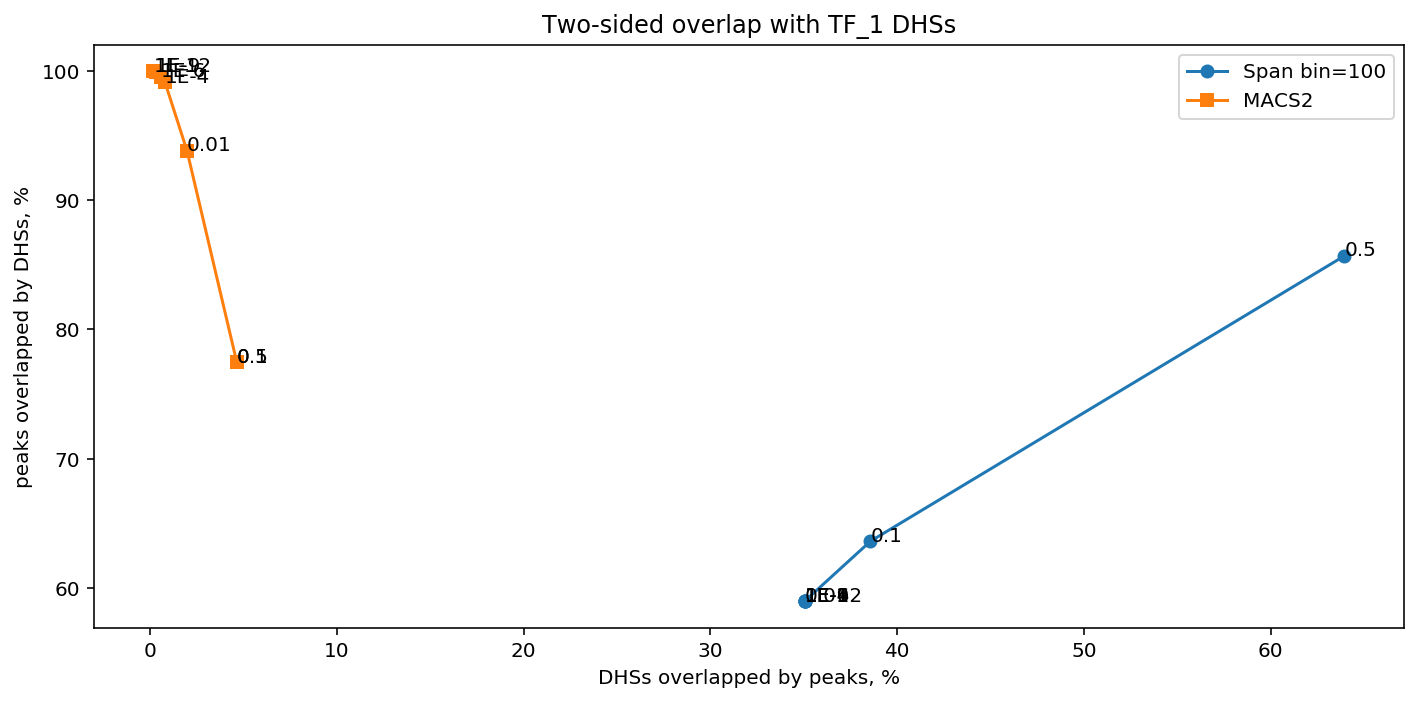

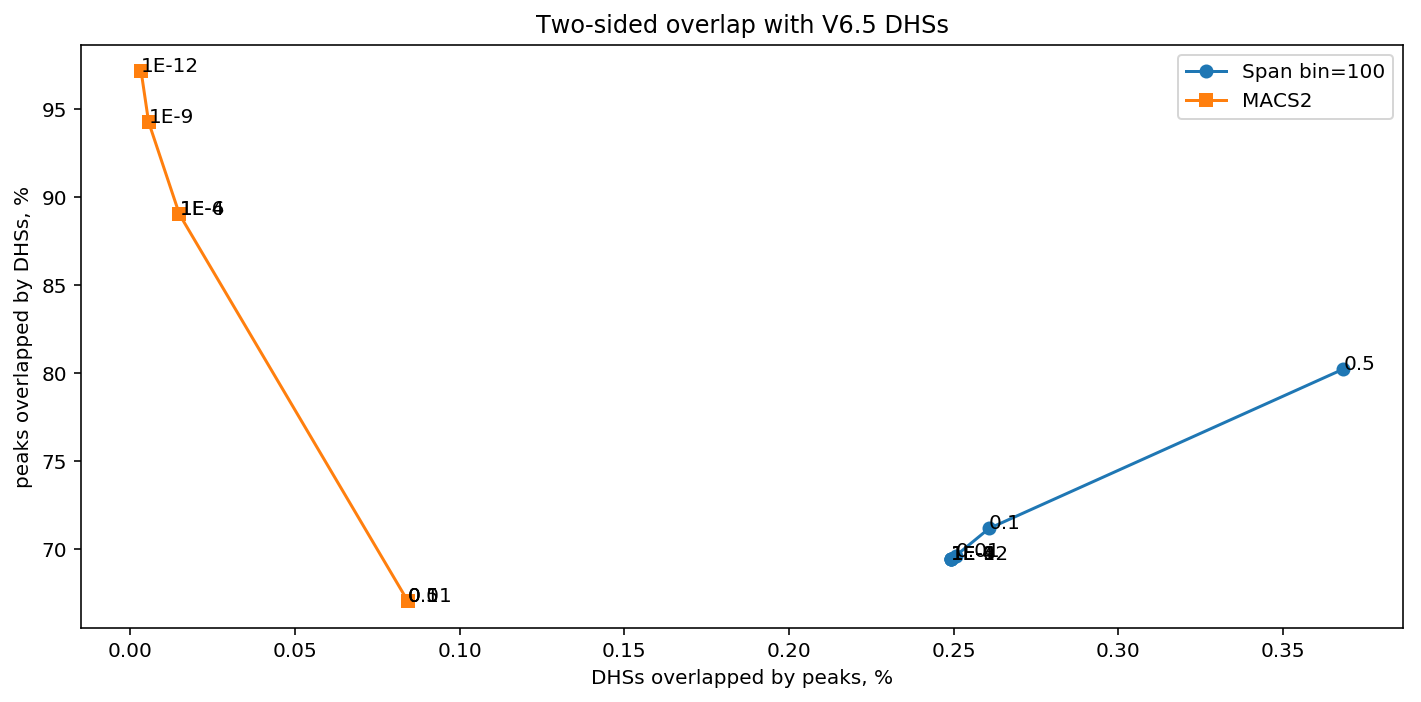

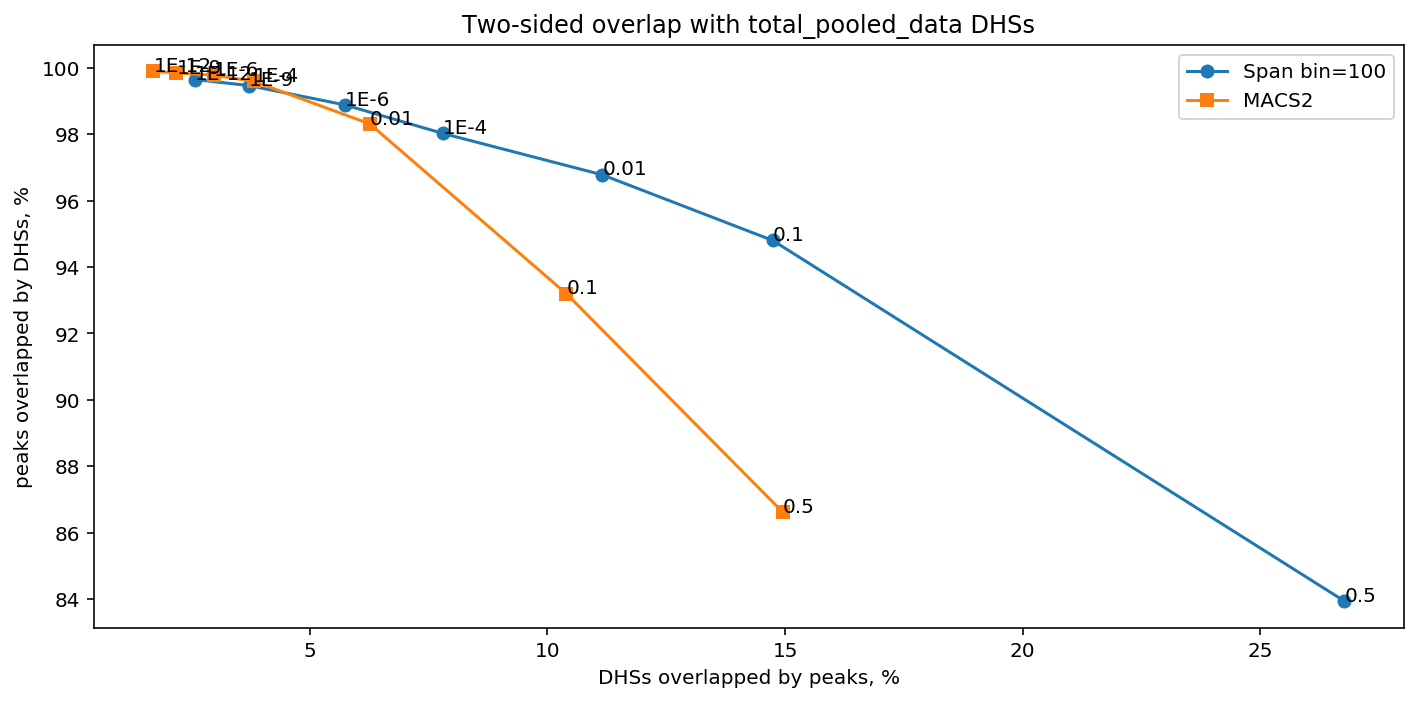

In [38]:
for cell in CELLS:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    for span_bin in SPAN_BINS:
        span_overlap_dataframe = \
        overlap_dataframe[np.logical_and(overlap_dataframe['cell'] == cell,
                                         np.logical_and(np.logical_and(overlap_dataframe['peak_caller'] == 'span',
                                                        overlap_dataframe['gap'] == 5),
                                         overlap_dataframe['bin'] == int(span_bin)))]
        plt.plot(span_overlap_dataframe['dhs_by_peak'], 
                 span_overlap_dataframe['peak_by_dhs'], 
                 'o-', 
                 label='Span bin=' + span_bin)
        for i,(x,y) in enumerate(zip(
            span_overlap_dataframe['dhs_by_peak'], 
            span_overlap_dataframe['peak_by_dhs'])):
            ax.annotate(str(QS[i]), xy=(x,y))

    macs2_overlap_dataframe = overlap_dataframe[np.logical_and(overlap_dataframe['cell'] == cell,
                                                               overlap_dataframe['peak_caller'] == 'macs2')]
    plt.plot(macs2_overlap_dataframe['dhs_by_peak'], 
             macs2_overlap_dataframe['peak_by_dhs'], 
             's-', label='MACS2')
    for i,(x,y) in enumerate(zip(
        macs2_overlap_dataframe['dhs_by_peak'], 
         macs2_overlap_dataframe['peak_by_dhs'])):
        ax.annotate(str(QS[i]), xy=(x,y))

    plt.legend()
    plt.title("Two-sided overlap with {} DHSs".format(cell))
    plt.xlabel("DHSs overlapped by peaks, %")
    plt.ylabel("peaks overlapped by DHSs, %")
    plt.tight_layout()
    plt.savefig('overlap_ROC.png', dpi=300)
    plt.show()

# Plot peak counts
Note that leukemia stem cell and lymphoid progenitor failed to fit, as well as leukemia blast cell for bin=50.

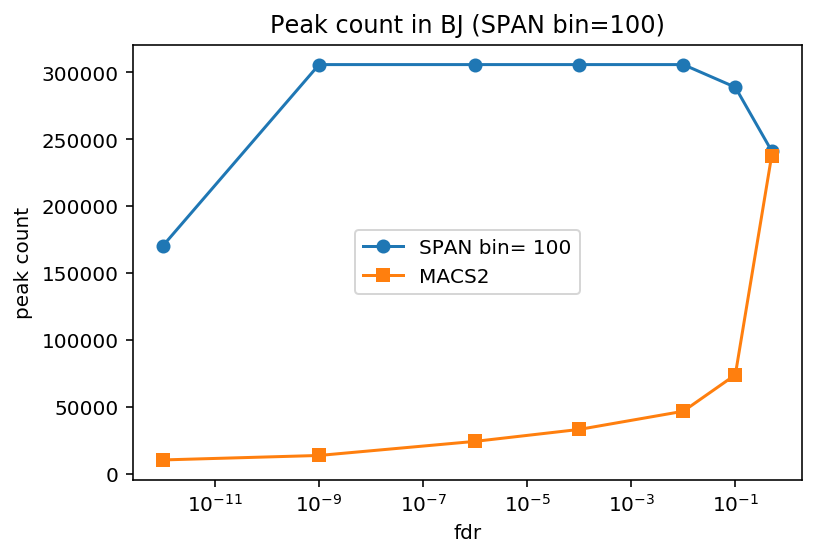

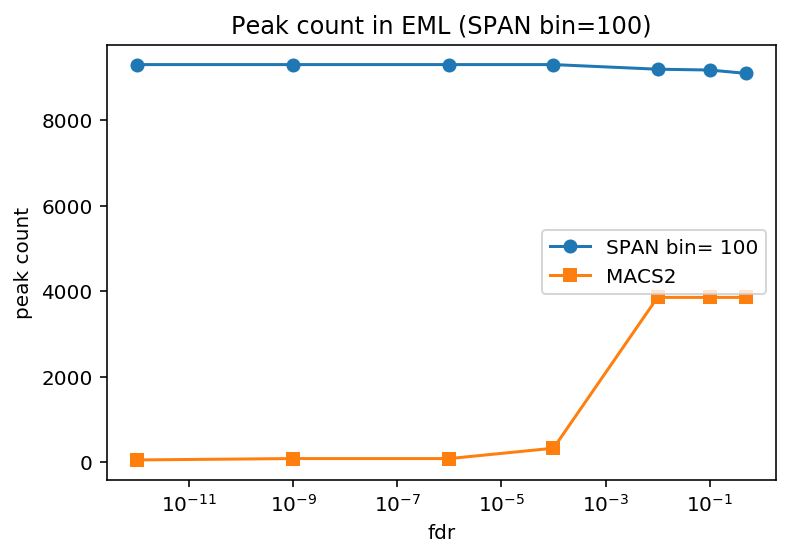

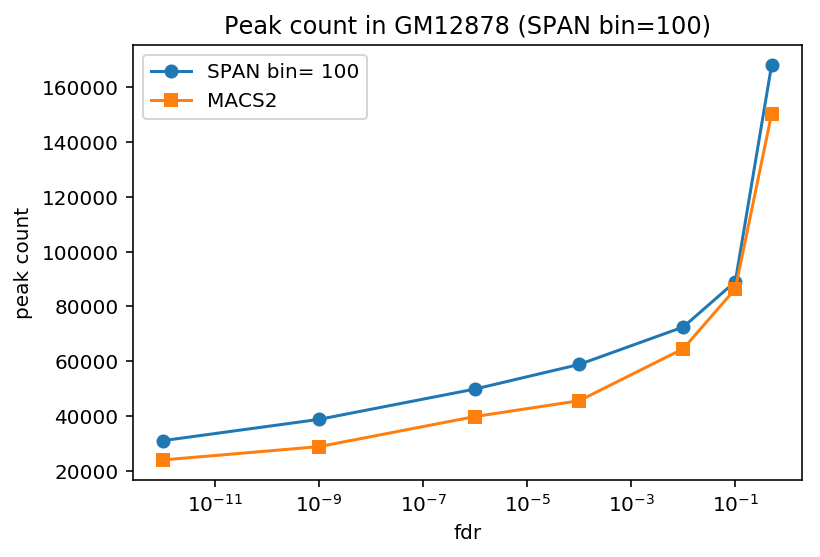

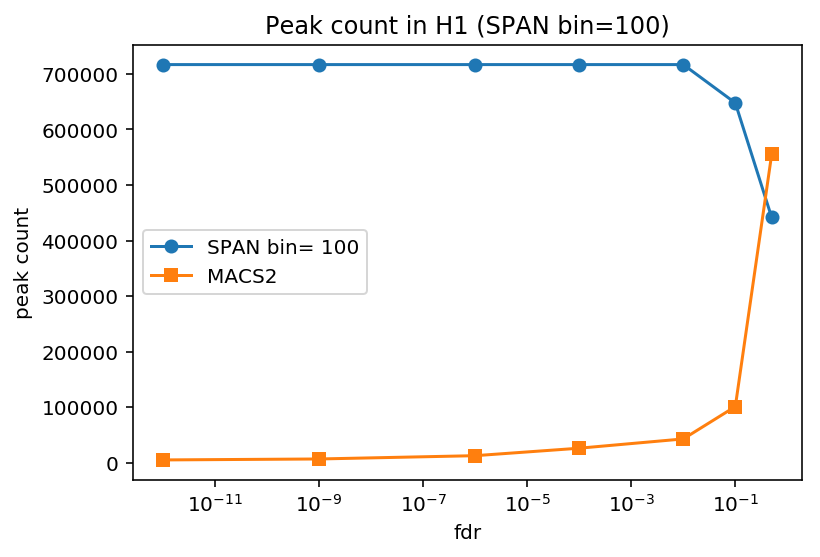

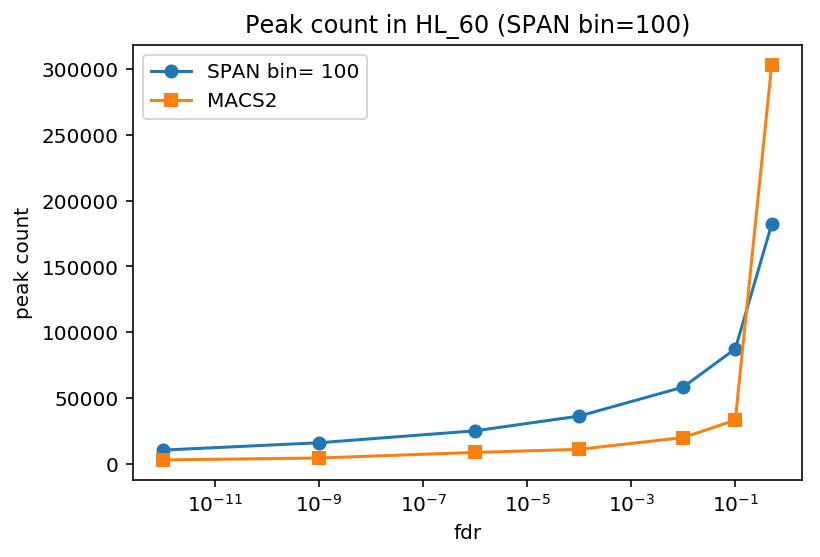

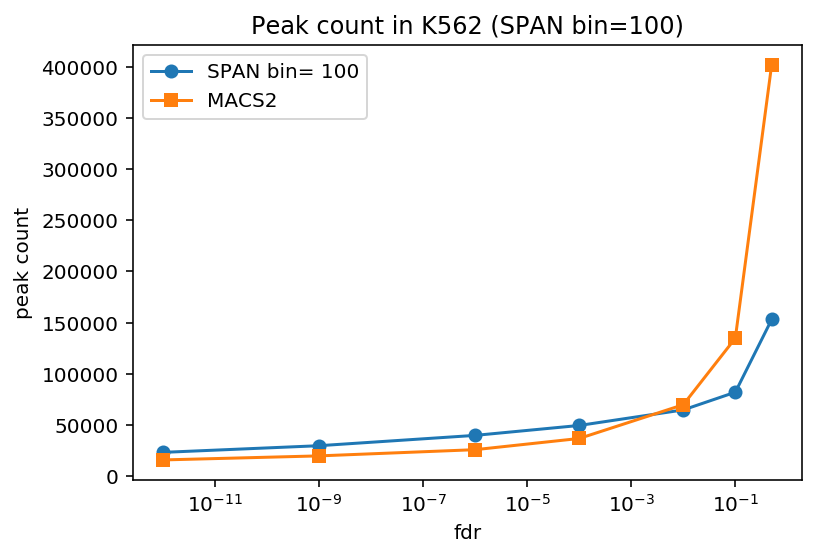

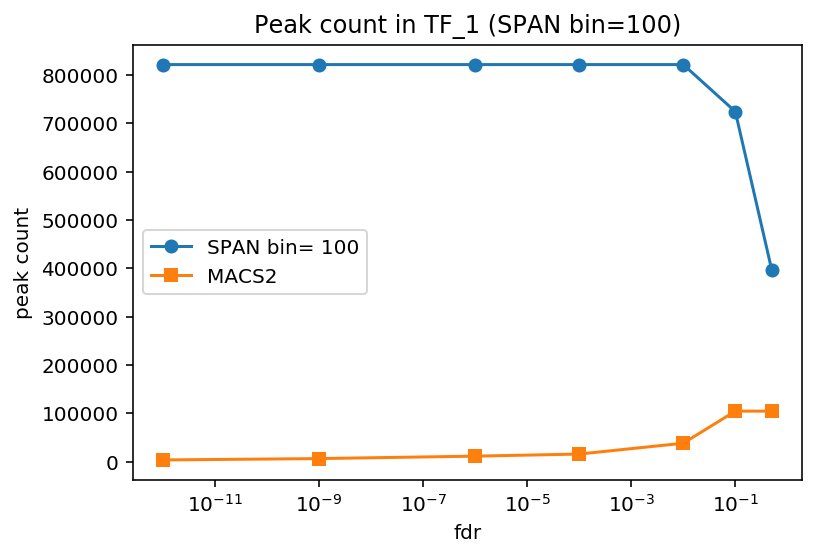

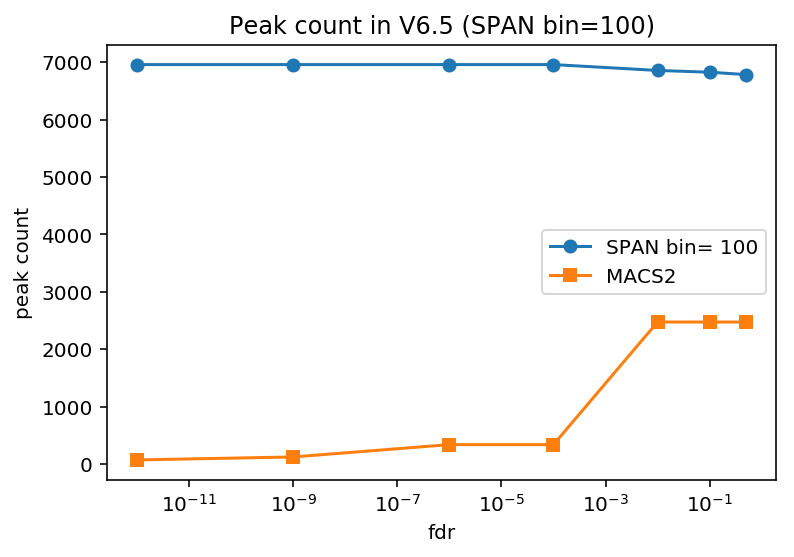

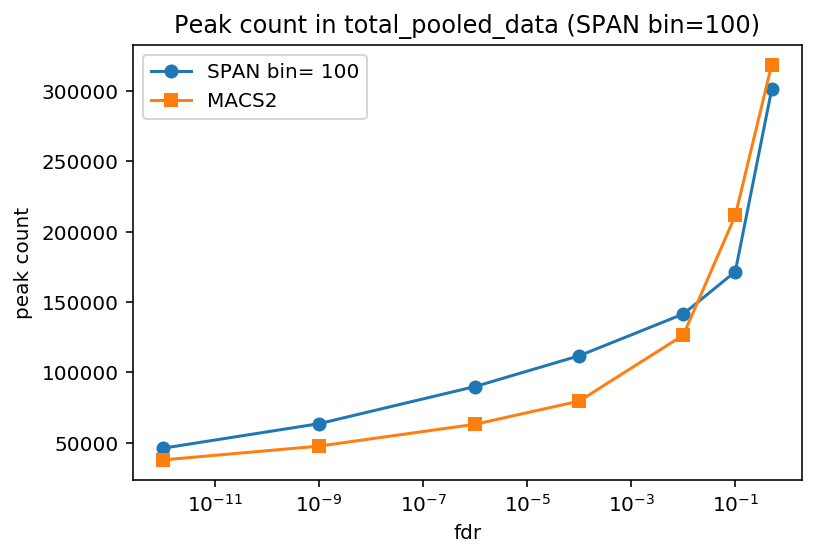

In [39]:
for cell in CELLS:
    for span_bin in SPAN_BINS:
        peak_count_dataframe = main_dataframe[
            np.logical_and(main_dataframe['cell'] == cell,
            np.logical_or(main_dataframe['peak_caller'] == 'macs2', main_dataframe['bin'] == int(span_bin)))]
        span_peak_count_5 = peak_count_dataframe[
            np.logical_and(peak_count_dataframe['peak_caller'] == 'span', peak_count_dataframe['gap'] == 5)]
        plt.plot(span_peak_count_5['q'], span_peak_count_5['peak_count'], 'o-', label='SPAN bin= ' + span_bin)

        macs2_peak_count = peak_count_dataframe[peak_count_dataframe['peak_caller'] == 'macs2']
        plt.plot(macs2_peak_count['q'], macs2_peak_count['peak_count'], 's-', label='MACS2')
        plt.xlabel('fdr')
        plt.xscale('log')
        plt.ylabel('peak count')
        plt.title('Peak count in ' + cell + ' (SPAN bin=' + span_bin + ')')        
        plt.legend()
        plt.show()

# Reworked visualization

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


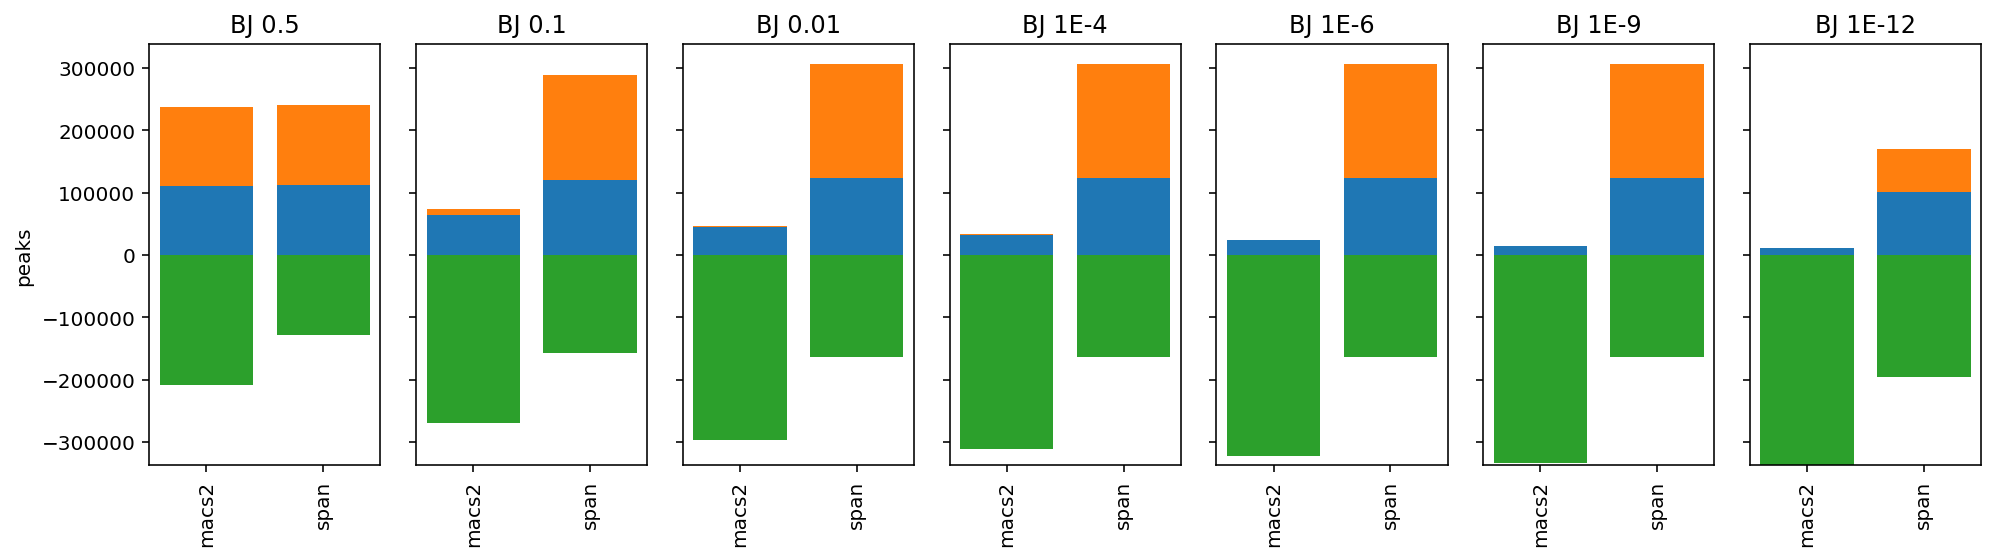

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


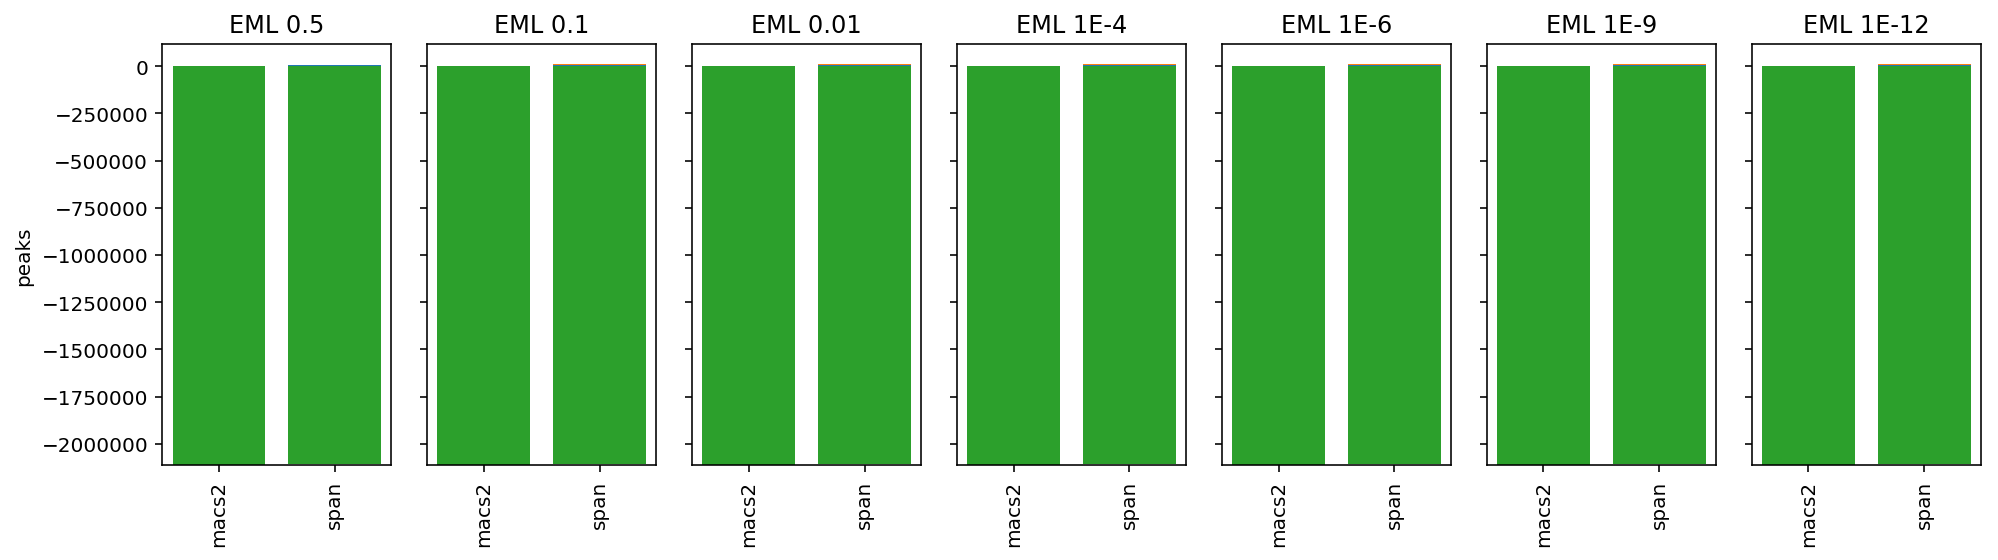

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


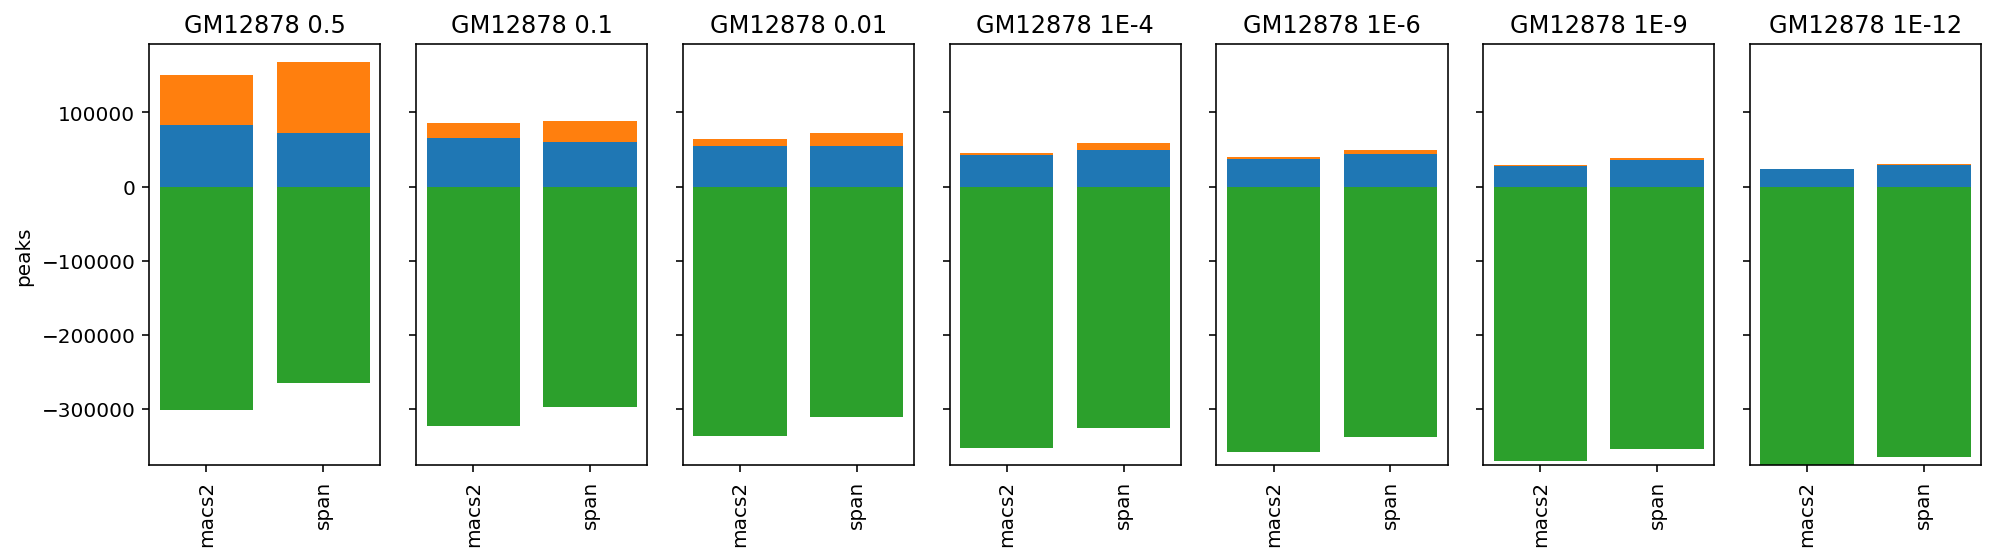

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


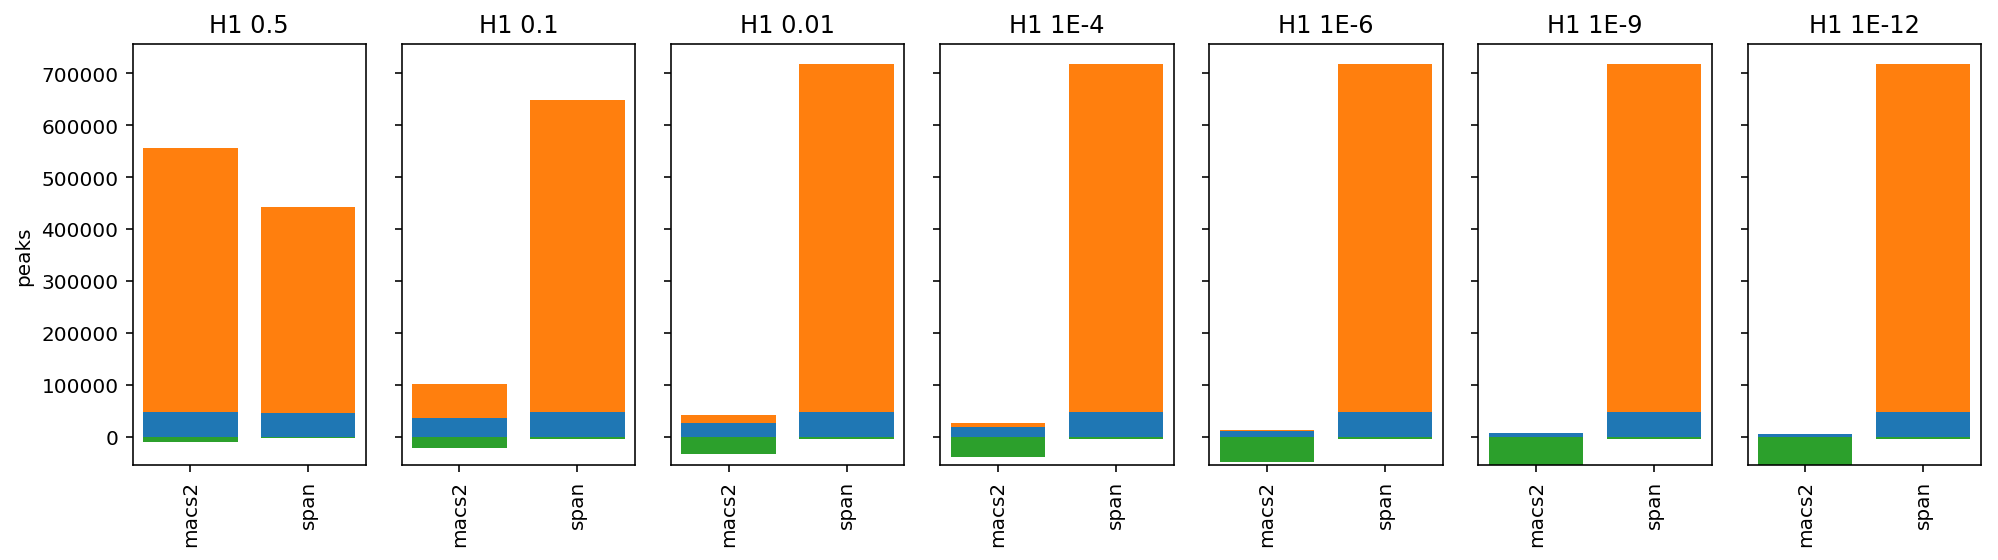

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


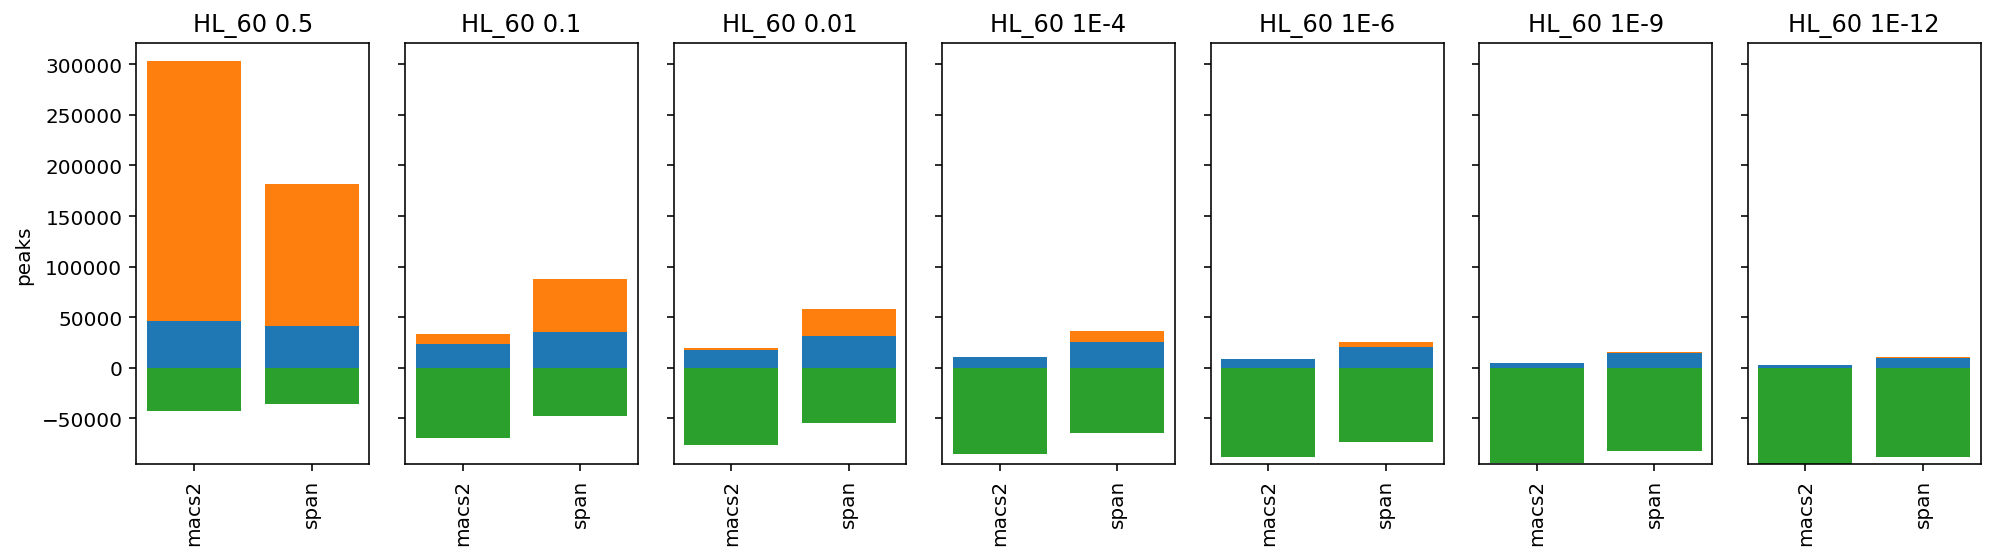

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


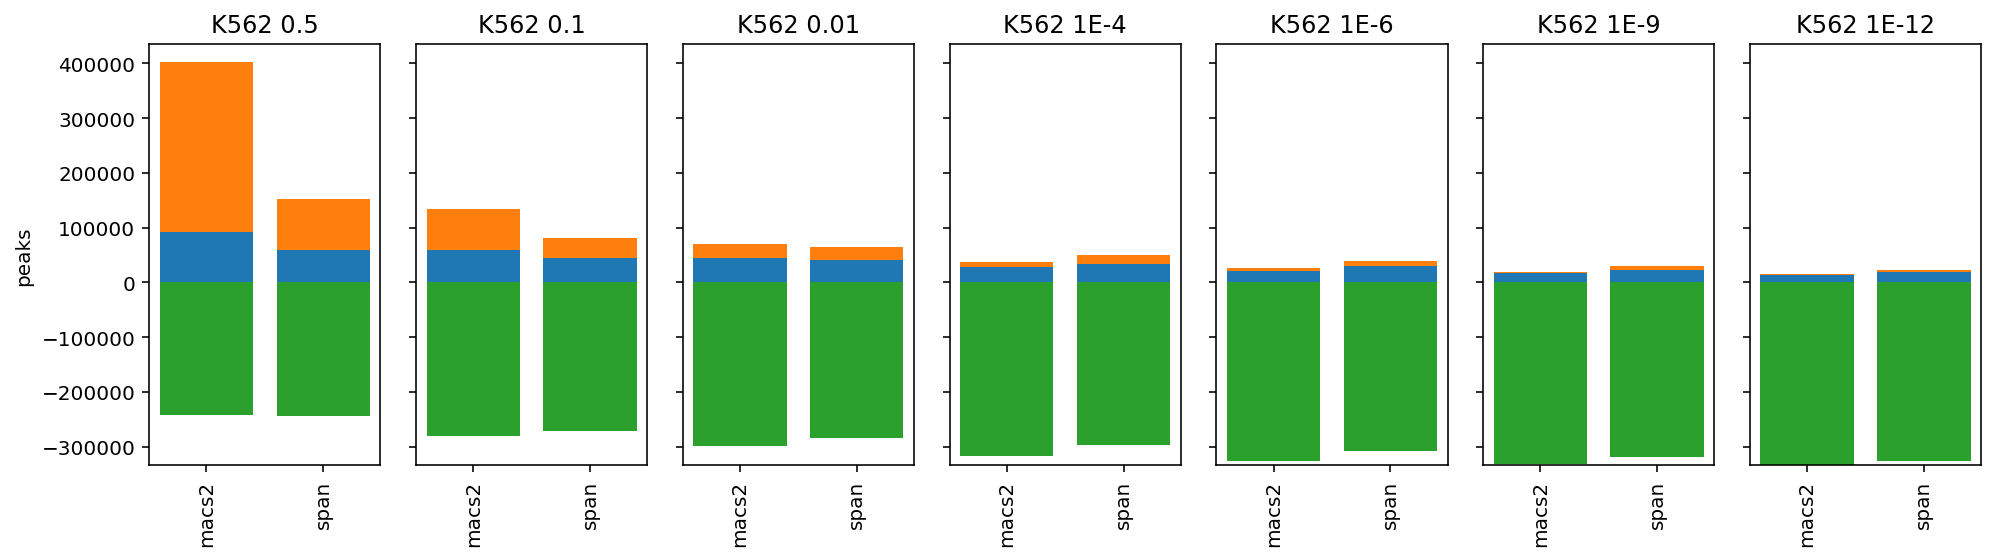

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


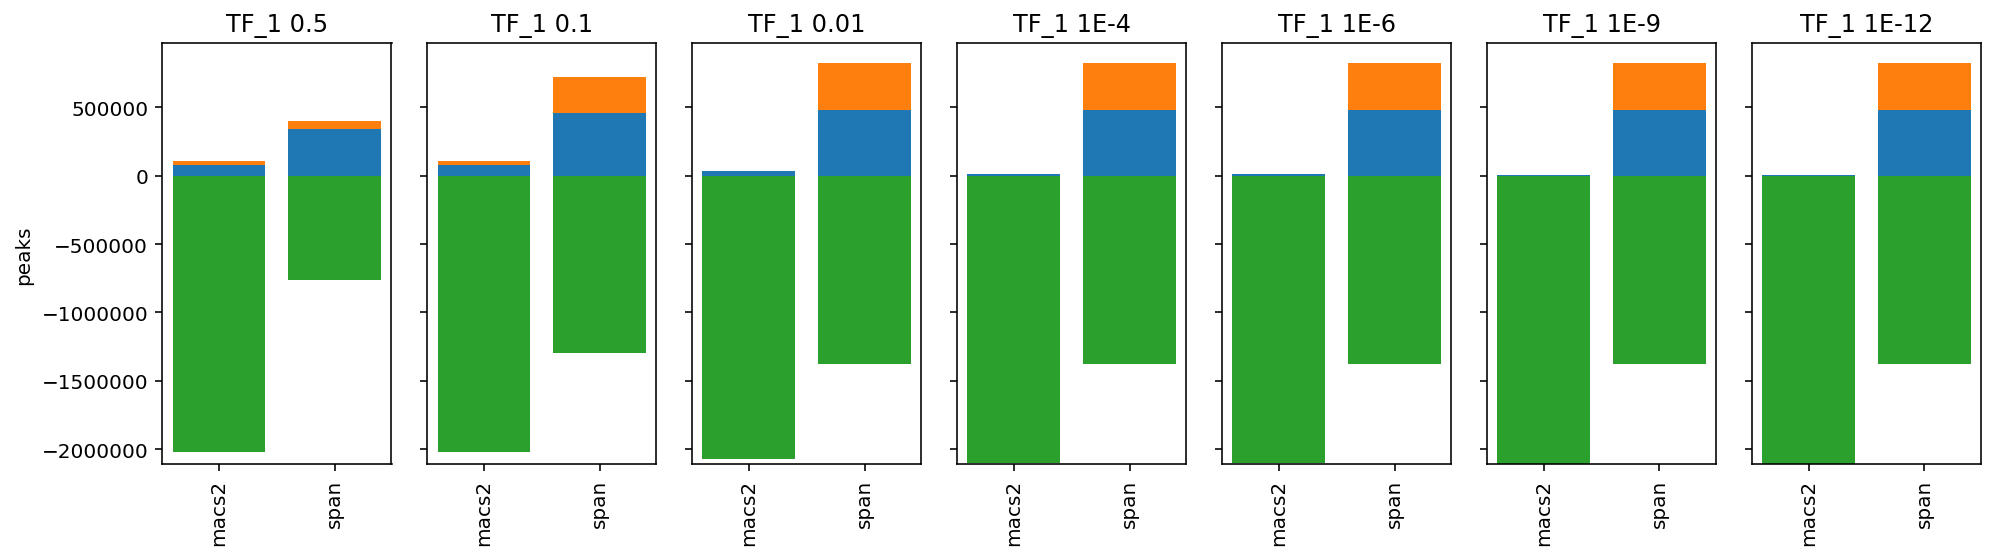

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


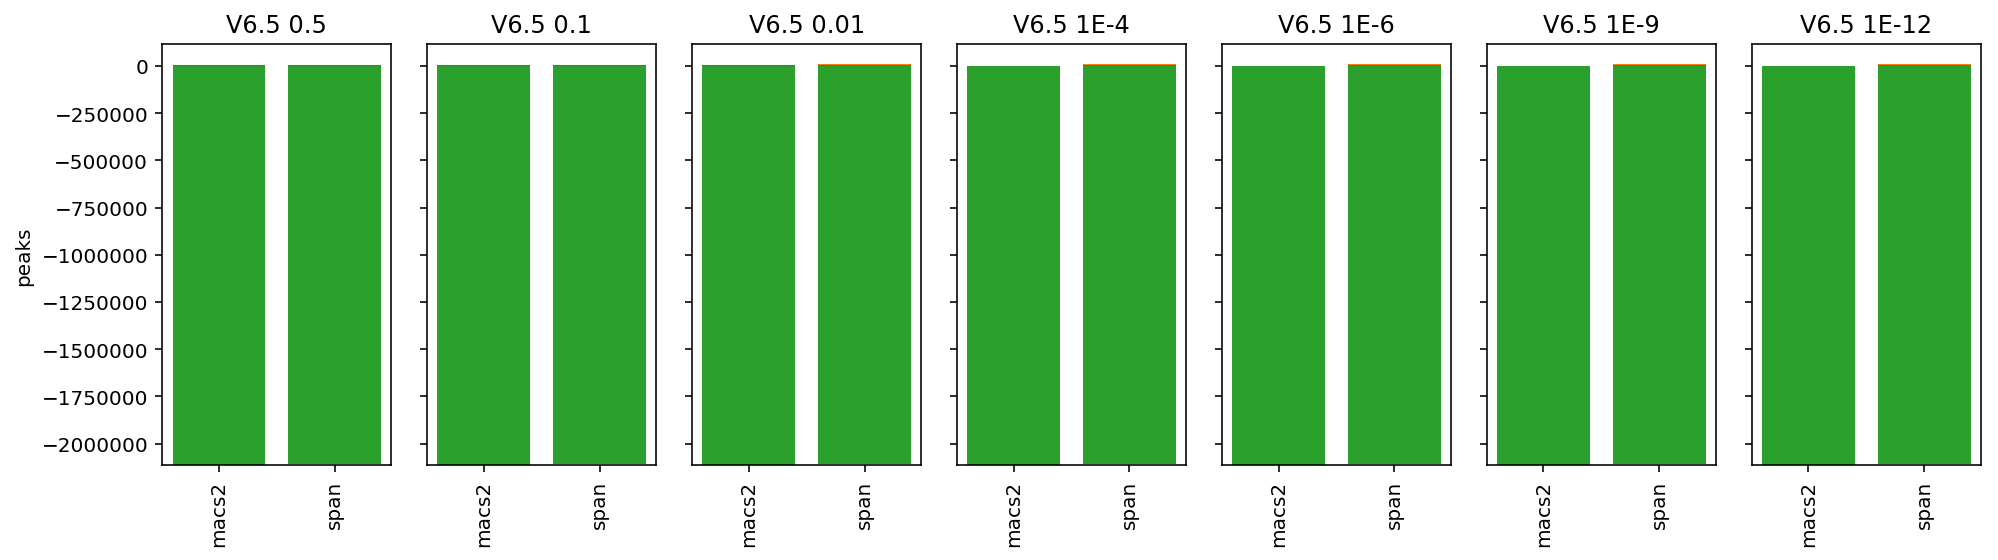

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


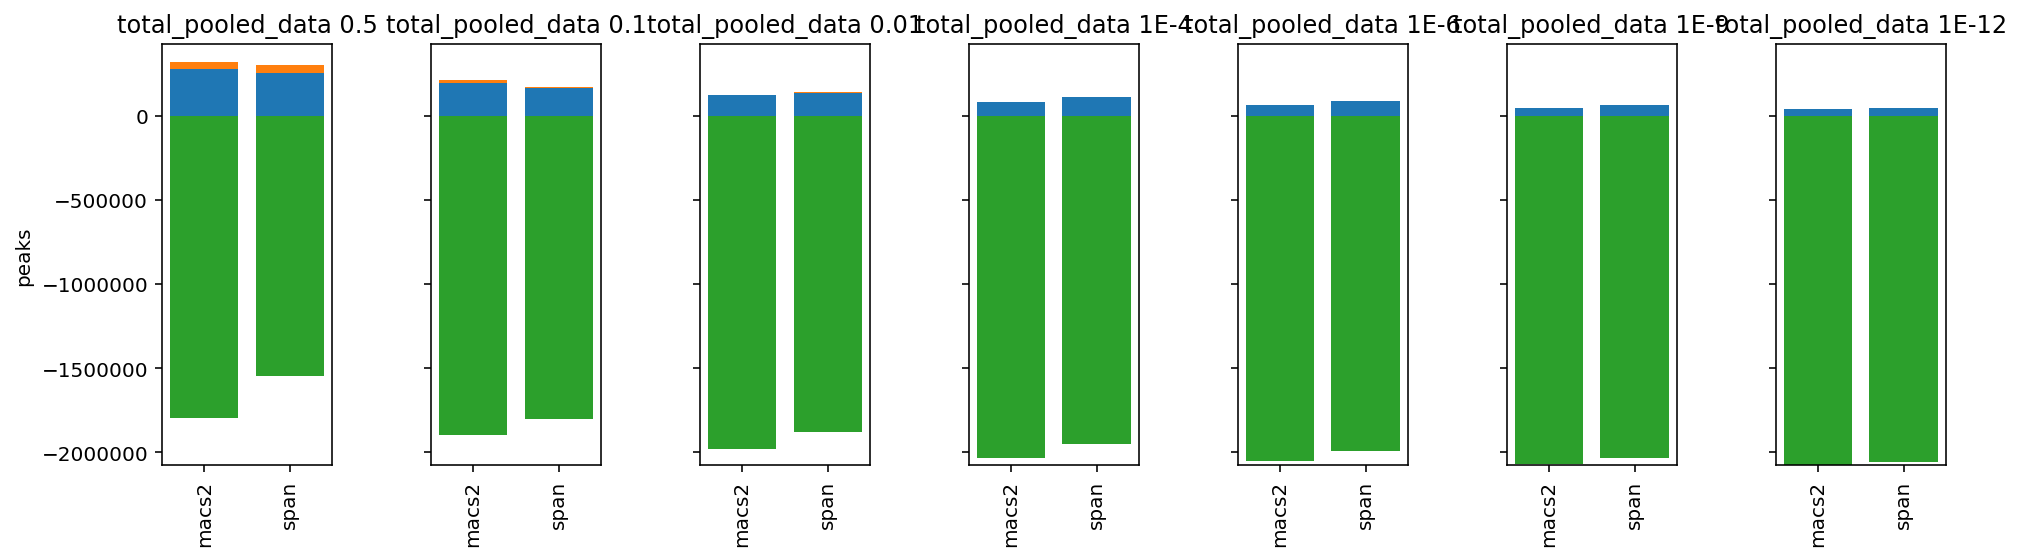

In [43]:
import seaborn as sns
for cell in CELLS:
    span_bin = "100"
    mdf = overlap_dataframe[overlap_dataframe['cell'] == cell]\
    [['peak_caller', 'q', 'peak_count', 'dhs_by_peak', 'peak_by_dhs']].copy()
    dhs_file = DHS_FILES[cell] if cell in DHS_FILES else dhs_hg19
    mdf['dhs_ex'] = (np.ones(len(mdf)) - mdf['dhs_by_peak'] / 100) * dhs_file.count()
    mdf['peaks_ex'] = (np.ones(len(mdf)) - mdf['peak_by_dhs'] / 100) * mdf['peak_count']
    mdf['both'] = mdf['peak_by_dhs'] * mdf['peak_count'] / 100

    axs = {}

    mdf['qp'] = mdf['q'].astype(str) + " " + mdf['peak_caller']
    qpl = len(set(mdf['qp']))
    fig = plt.figure(figsize=(qpl, 4))
    offset = 0
    for q in QS:
        data = mdf.loc[mdf['q'] == float(q)]
        xlabels = []
        for t in data['peak_caller']:
            if t not in xlabels:
                xlabels.append(t)
        w = len(set(data['peak_caller']))
        ax = plt.subplot2grid((1, qpl), (0, offset), colspan=w)
        p1 = ax.bar(data['peak_caller'], data['both'])
        p2 = ax.bar(data['peak_caller'], data['peaks_ex'],
                    bottom=data['both'])
        p3 = ax.bar(data['peak_caller'], data['dhs_ex'],
                    bottom=-data['dhs_ex'])

        ax.legend().set_visible(False)
        axs[ax] = plt.ylim()
        if offset > 0:
            ax.get_yaxis().set_ticklabels([])
            ax.set_ylabel('')
        else:
            ax.set_ylabel('peaks')

        offset += w
        ax.set_xlabel('')
        ax.set_title(cell + ' ' + q)
        plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)

    ymin = np.min([v[0] for v in axs.values()])
    ymax = np.max([v[1] for v in axs.values()])

    for ax in axs.keys():
        ax.set_ylim(bottom = ymin, top = ymax)
    plt.tight_layout()
    plt.show()

# True positives visualization

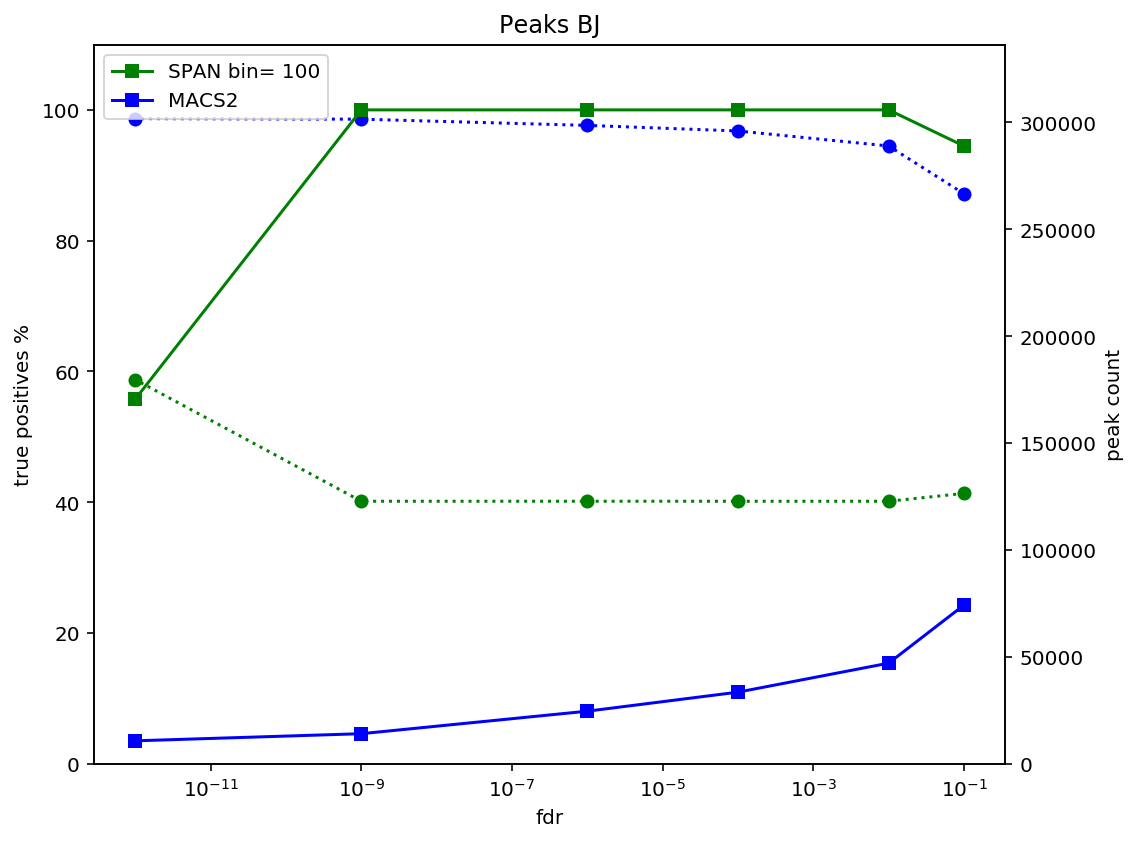

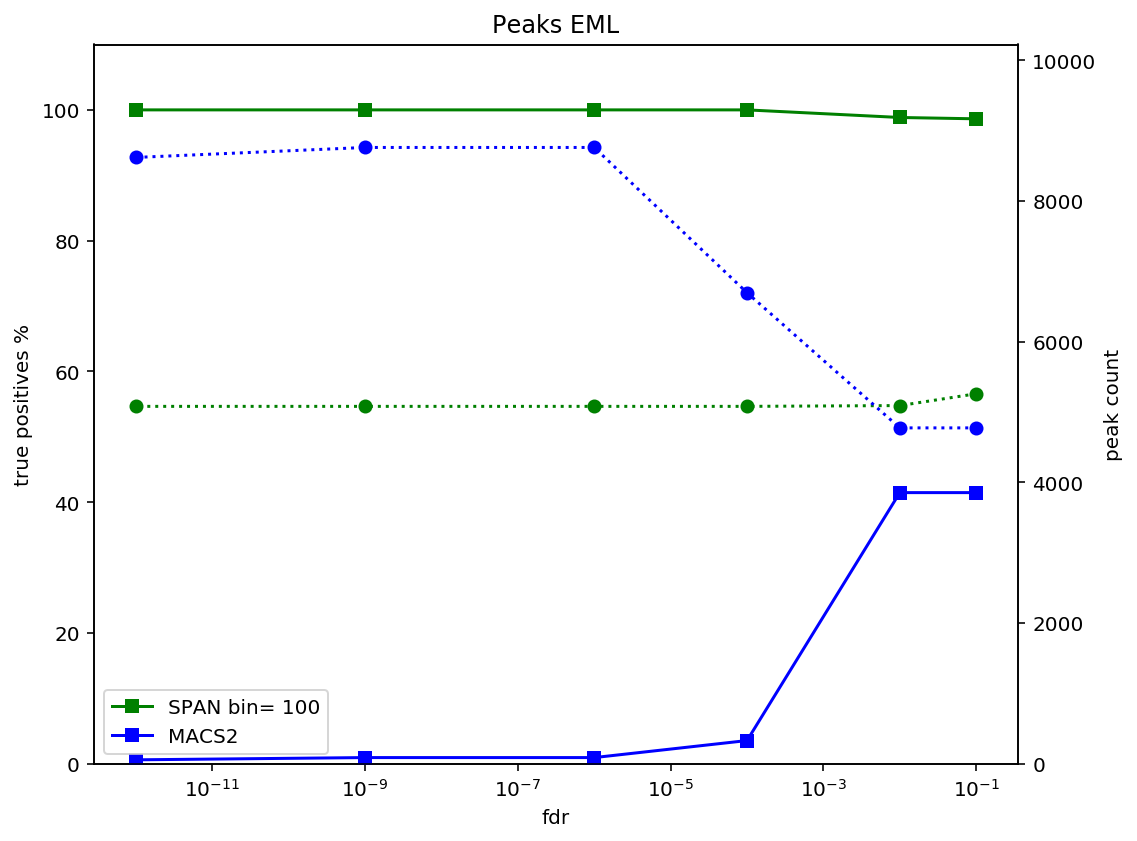

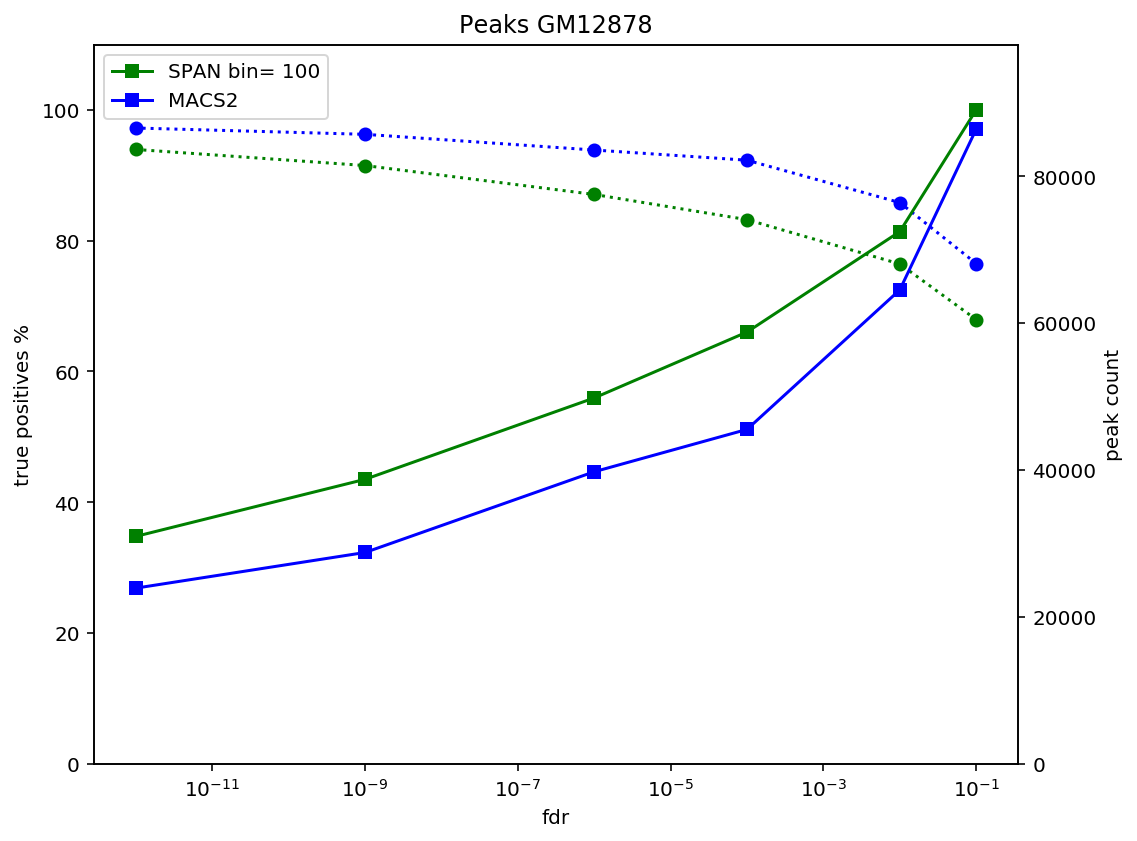

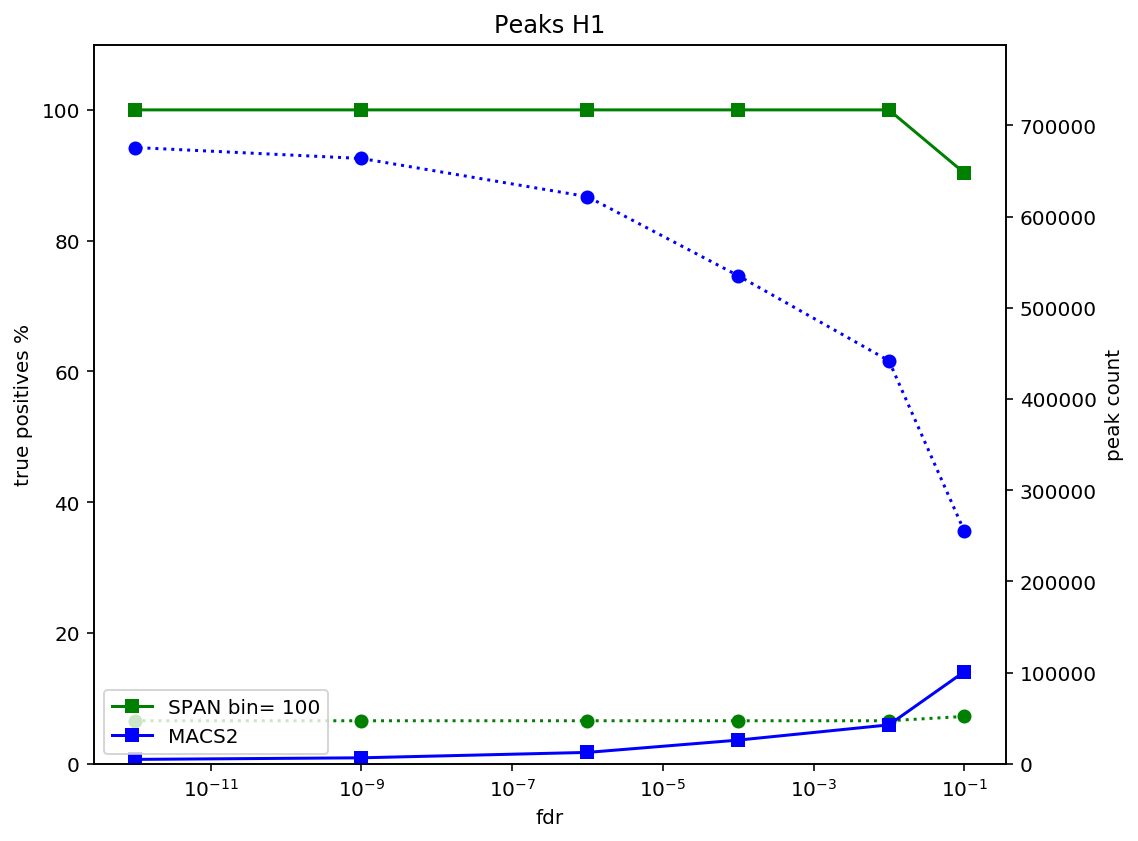

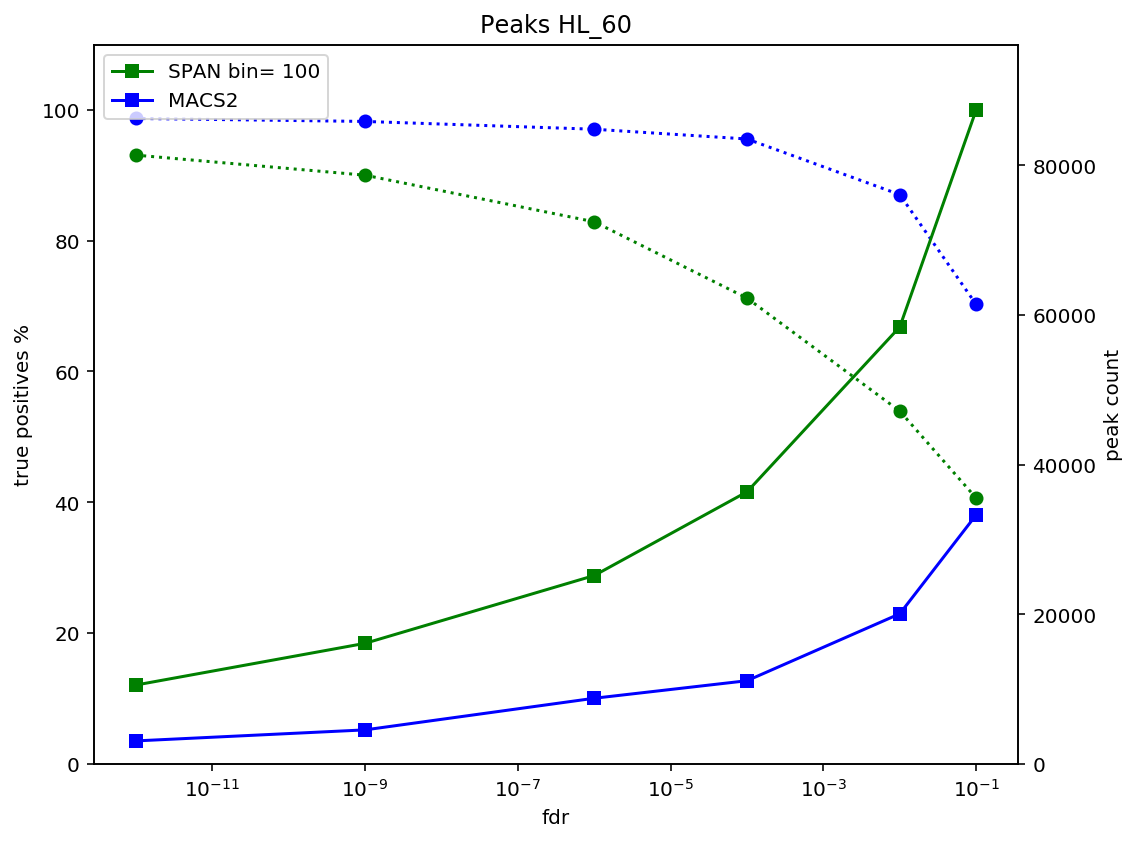

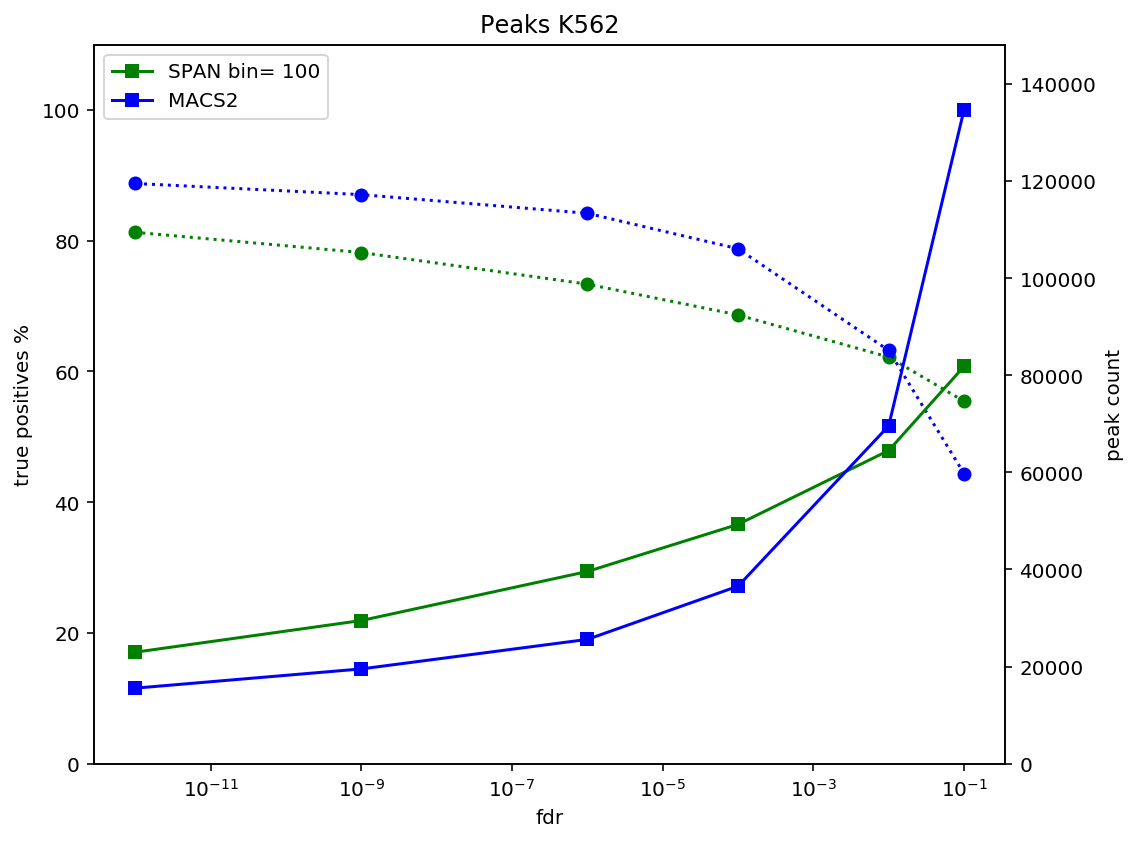

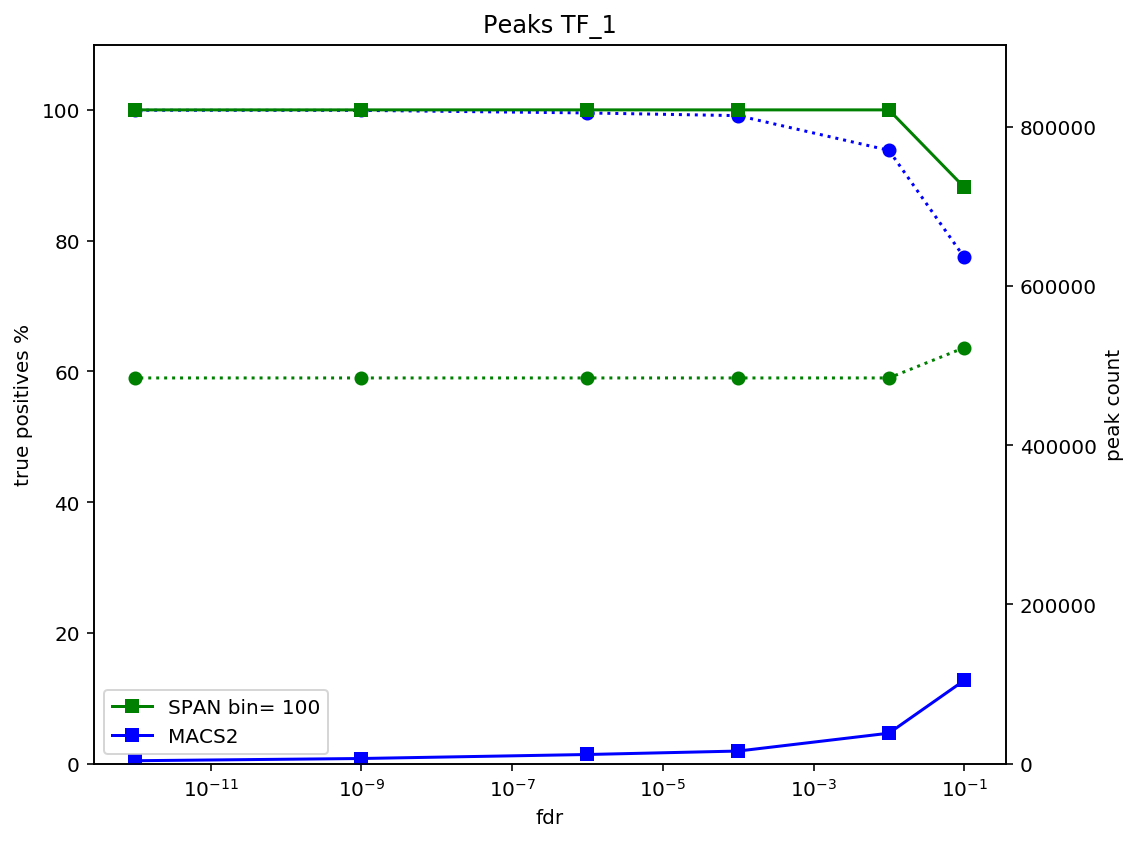

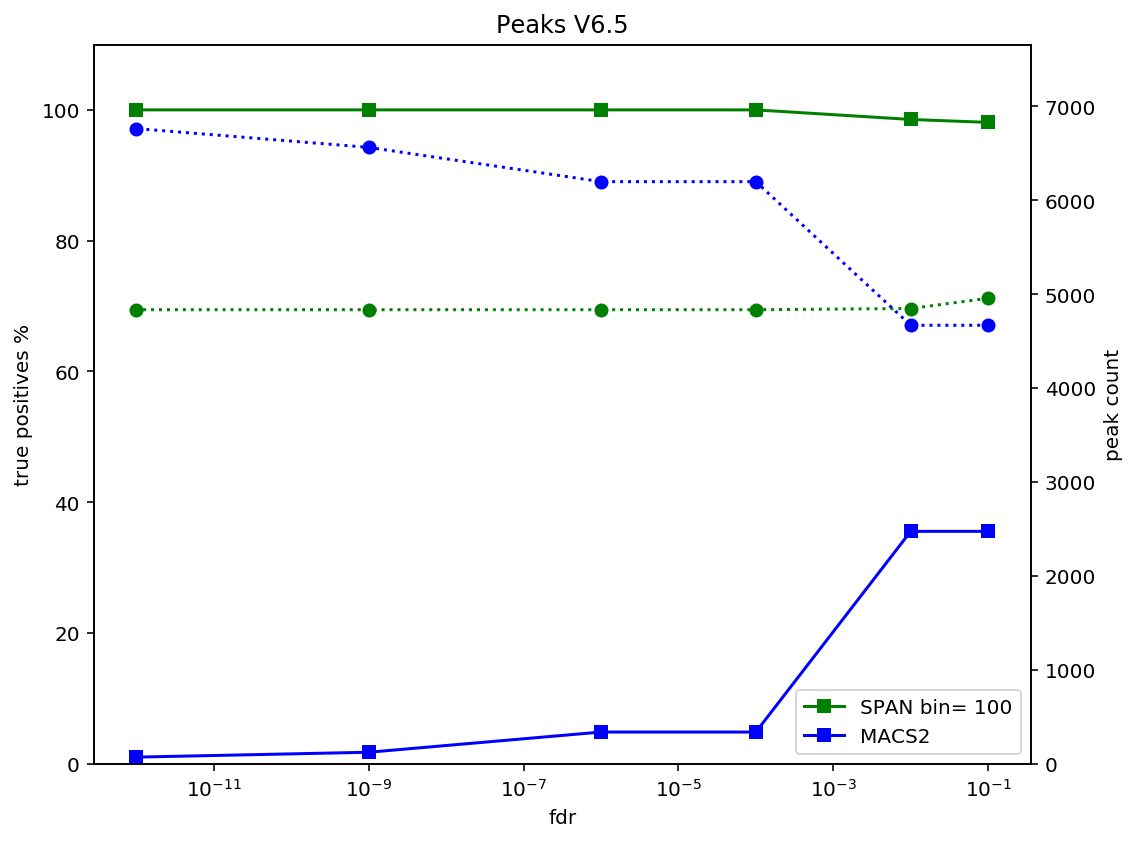

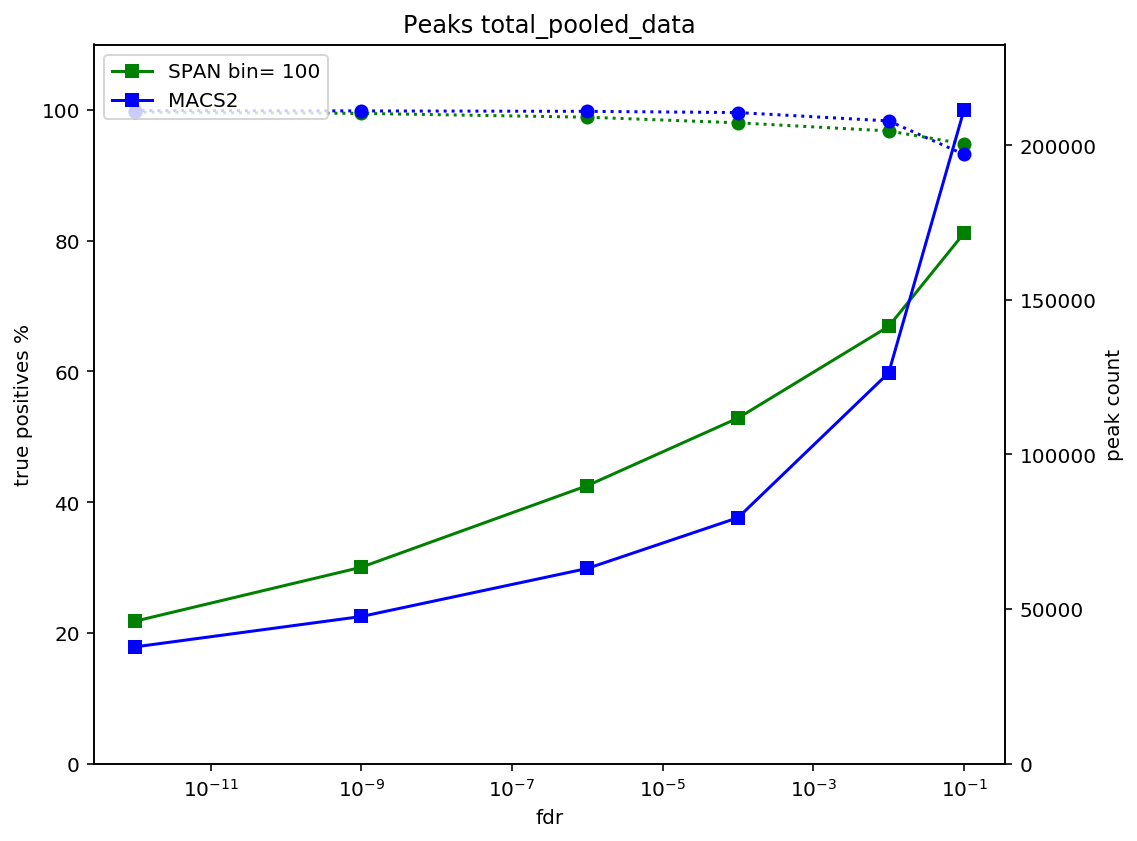

In [40]:
for cell in CELLS:
    span_bin = "100"
    peak_count_dataframe = main_dataframe[
        np.logical_and(np.logical_and(main_dataframe['cell'] == cell, main_dataframe['q'] <= 0.1),
        np.logical_or(main_dataframe['peak_caller'] == 'macs2', main_dataframe['bin'] == int(span_bin)))]
    span_peak_count_5 = peak_count_dataframe[
        np.logical_and(peak_count_dataframe['peak_caller'] == 'span', peak_count_dataframe['gap'] == 5)]
    macs2_peak_count = peak_count_dataframe[peak_count_dataframe['peak_caller'] == 'macs2']

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_ylim(0, 110)
    ax1.plot(span_peak_count_5['q'], span_peak_count_5['peak_by_dhs'], 'o:', c='green', label='SPAN bin= ' + span_bin)
    ax1.plot(macs2_peak_count['q'], macs2_peak_count['peak_by_dhs'], 'o:', c='blue', label='MACS2')
    ax1.set_ylabel('true positives %')
    ax1.set_xlabel('fdr')

    ax2 = ax1.twinx()
    ax2.set_ylim(0, 1.1 * max(peak_count_dataframe['peak_count']))
    ax2.plot(span_peak_count_5['q'], span_peak_count_5['peak_count'], 's-', c='green', label='SPAN bin= ' + span_bin)
    ax2.plot(macs2_peak_count['q'], macs2_peak_count['peak_count'], 's-', c='blue', label='MACS2')
    ax2.set_xscale('log')
    ax2.set_ylabel('peak count')

    plt.title('Peaks ' + cell)        
    plt.legend()

    fig.tight_layout()
    plt.show()